In [1]:
import operator
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import xgboost as xgb
from sklearn.model_selection import train_test_split
import statsmodels.api as sm
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import RandomizedSearchCV
from sklearn.model_selection import StratifiedKFold

In [2]:
nba_data = pd.read_csv('F:/Rahul Subjects/Data Mining/nba_logreg.csv')

In [3]:
nba_data.head()

,Name,GP,MIN,PTS,FGM,FGA,FG%,3P Made,3PA,3P%,...,FTA,FT%,OREB,DREB,REB,AST,STL,BLK,TOV,TARGET_5Yrs
0,Brandon Ingram,36,27.4,7.4,2.6,7.6,34.7,0.5,2.1,25.0,...,2.3,69.9,0.7,3.4,4.1,1.9,0.4,0.4,1.3,0.0
1,Andrew Harrison,35,26.9,7.2,2.0,6.7,29.6,0.7,2.8,23.5,...,3.4,76.5,0.5,2.0,2.4,3.7,1.1,0.5,1.6,0.0
2,JaKarr Sampson,74,15.3,5.2,2.0,4.7,42.2,0.4,1.7,24.4,...,1.3,67.0,0.5,1.7,2.2,1.0,0.5,0.3,1.0,0.0
3,Malik Sealy,58,11.6,5.7,2.3,5.5,42.6,0.1,0.5,22.6,...,1.3,68.9,1.0,0.9,1.9,0.8,0.6,0.1,1.0,1.0
4,Matt Geiger,48,11.5,4.5,1.6,3.0,52.4,0.0,0.1,0.0,...,1.9,67.4,1.0,1.5,2.5,0.3,0.3,0.4,0.8,1.0


# Handling Null Values

In [4]:
nba_data.isnull().sum()

Name            0
GP              0
MIN             0
PTS             0
FGM             0
FGA             0
FG%             0
3P Made         0
3PA             0
3P%            11
FTM             0
FTA             0
FT%             0
OREB            0
DREB            0
REB             0
AST             0
STL             0
BLK             0
TOV             0
TARGET_5Yrs     0
dtype: int64

In [5]:
nba_data[nba_data.isna().any(axis=1)]

,Name,GP,MIN,PTS,FGM,FGA,FG%,3P Made,3PA,3P%,...,FTA,FT%,OREB,DREB,REB,AST,STL,BLK,TOV,TARGET_5Yrs
338,Ken Johnson,64,12.7,4.1,1.8,3.3,52.8,0.0,0.0,NaN,...,1.3,43.5,1.4,2.4,3.8,0.3,0.2,0.3,0.9,0.0
339,Ken Johnson,64,12.7,4.1,1.8,3.3,52.8,0.0,0.0,NaN,...,1.3,43.5,1.4,2.4,3.8,0.3,0.2,0.3,0.9,0.0
340,Pete Williams,53,10.8,2.8,1.3,2.1,60.4,0.0,0.0,NaN,...,0.8,42.5,0.9,1.9,2.8,0.3,0.4,0.4,0.4,0.0
358,Melvin Turpin,79,24.7,10.6,4.6,9.0,51.1,0.0,0.0,NaN,...,1.8,78.4,2.0,3.8,5.7,0.5,0.5,1.1,1.5,1.0
386,Jim Petersen,60,11.9,3.2,1.2,2.4,48.6,0.0,0.0,NaN,...,1.1,75.8,0.7,1.7,2.5,0.5,0.2,0.5,1.2,1.0
397,Tom Scheffler,39,6.9,1.3,0.5,1.3,41.2,0.0,0.0,NaN,...,0.5,50.0,0.5,1.5,1.9,0.3,0.2,0.3,0.4,0.0
507,Sam Williams,59,18.2,6.1,2.6,4.7,55.6,0.0,0.0,NaN,...,1.5,55.1,1.5,3.7,5.2,0.6,0.8,1.3,1.1,0.0
509,Kurt Nimphius,63,17.2,5.3,2.2,4.7,46.1,0.0,0.0,NaN,...,1.7,58.3,1.5,3.2,4.7,1.0,0.3,1.3,0.9,1.0
510,Pete Verhoeven,71,17.0,4.9,2.1,4.2,50.3,0.0,0.0,NaN,...,1.0,70.8,1.5,2.1,3.6,0.7,0.6,0.3,0.8,1.0
521,Jim Smith,72,11.9,2.9,1.2,2.3,50.9,0.0,0.0,NaN,...,1.2,45.9,1.0,1.5,2.5,0.6,0.3,0.7,0.7,0.0


### 3P% = (3P Made/3PA)*100
### FG% = (FGM/FGA)*100
### FT% = (FTM/FTA)*100

In [6]:
nba_data = nba_data.fillna(0)

### This is because the 3P% is calculated from 3P Made and 3PA. And we can see from the above table that both 3P Made and 3PA are 0's so it is better to fill the 3P% with 0 as well.

# Handling Duplicates

In [7]:
df = nba_data

In [8]:
nba_data.shape

(1340, 21)

In [9]:
df = df.drop_duplicates()
print( df.shape )

(1328, 21)


### There were twelve duplicates and we dropped them.

# Handling Outliers

In [10]:
df = df.drop('Name', axis=1)

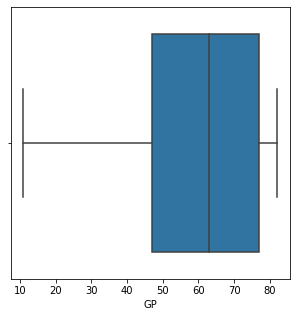

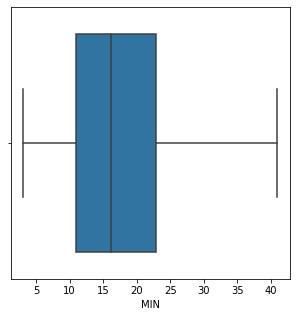

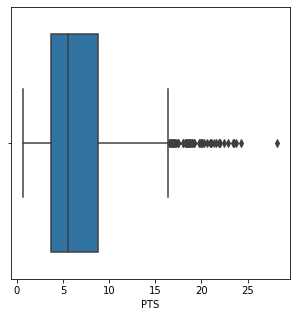

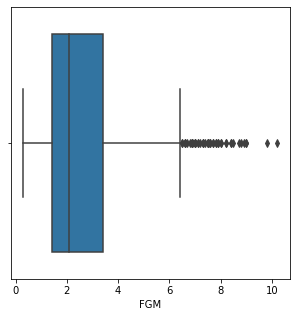

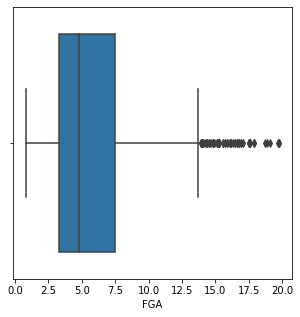

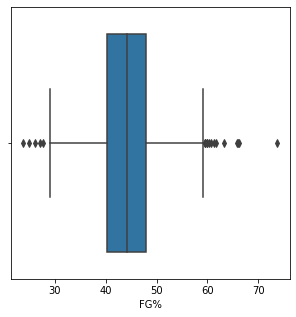

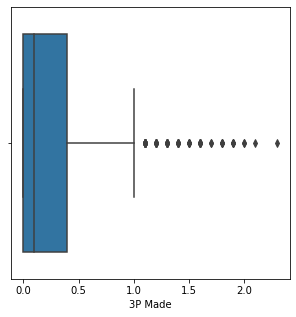

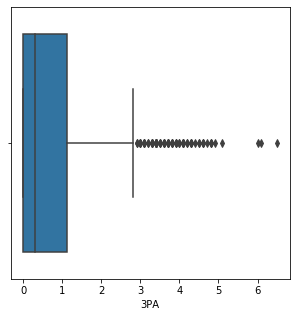

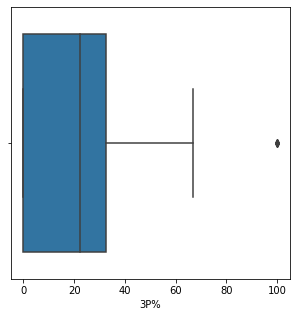

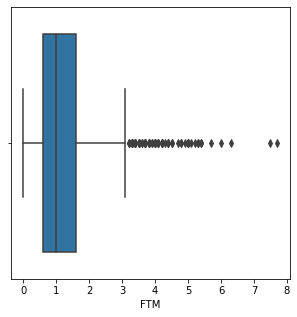

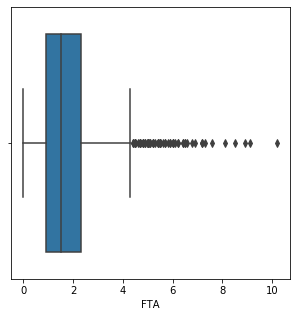

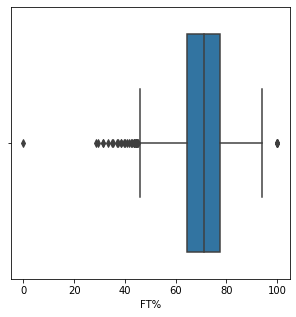

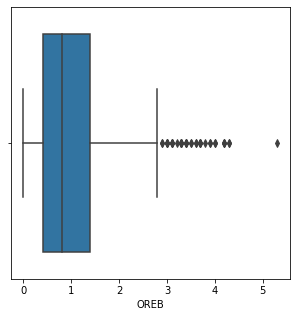

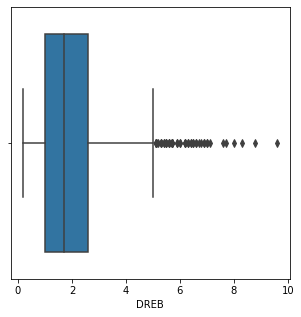

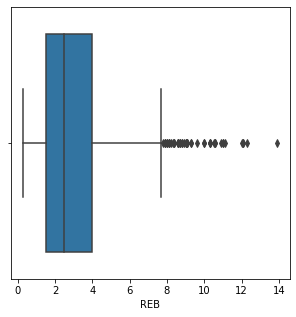

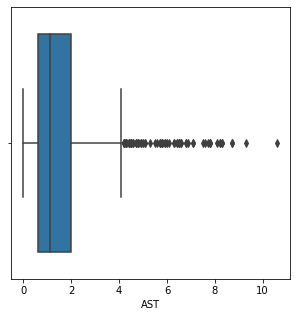

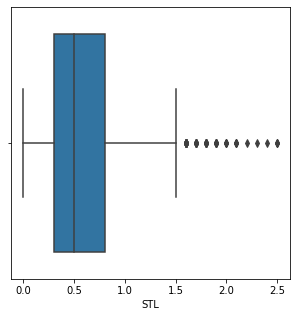

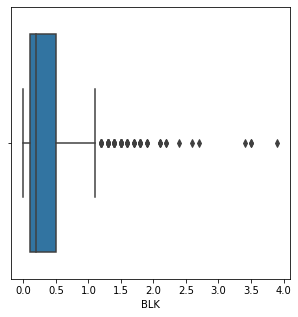

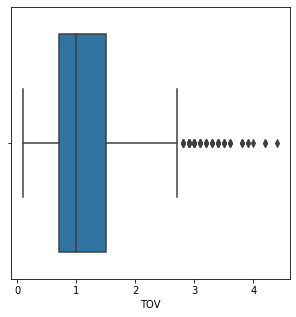

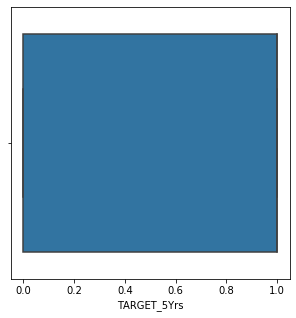

In [11]:
for col in df.columns:
    plt.figure(figsize=(5,5))
    ax = sns.boxplot(x=df[col])

### From these set of graphs we take the graphs that have outstanding outliers and remove them. 

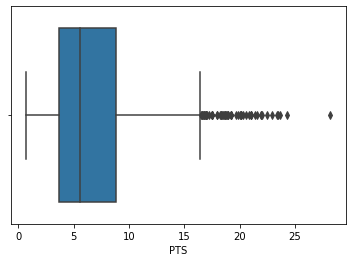

In [12]:
sns.boxplot(df['PTS'])

In [13]:
df['PTS'].sort_values(ascending=False).head()

352     28.2
118     24.3
442     23.7
1157    23.5
1308    23.4
Name: PTS, dtype: float64

In [14]:
df = df[df['PTS'] <=25 ]
df.shape

(1327, 20)

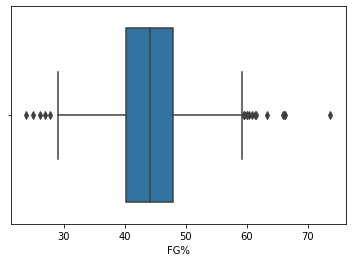

In [15]:
sns.boxplot(df['FG%'])

In [16]:
df['FG%'].sort_values(ascending=False).head(10)

1109    73.7
728     66.2
692     66.1
301     65.9
761     63.3
791     61.6
500     61.3
597     60.8
340     60.4
359     60.0
Name: FG%, dtype: float64

In [17]:
df = df[df['FG%'] <=70 ]
df.shape

(1326, 20)

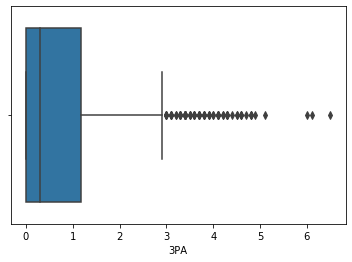

In [18]:
sns.boxplot(df['3PA'])

In [19]:
df['3PA'].sort_values(ascending=False).head(10)

1087    6.5
585     6.1
1157    6.0
1158    5.1
922     4.9
1190    4.8
172     4.8
698     4.8
699     4.7
1164    4.6
Name: 3PA, dtype: float64

In [20]:
df = df[df['3PA'] <=5.5 ]
df.shape

(1323, 20)

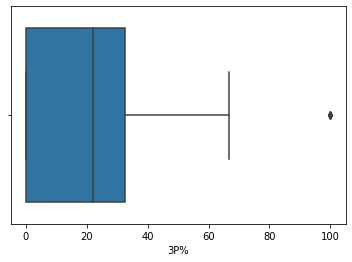

In [21]:
sns.boxplot(df['3P%'])

In [22]:
df['3P%'].sort_values(ascending=False).head()

1253    100.0
1174    100.0
45      100.0
1053    100.0
528      66.7
Name: 3P%, dtype: float64

In [23]:
df = df[df['3P%'] <=80 ]
df.shape

(1319, 20)

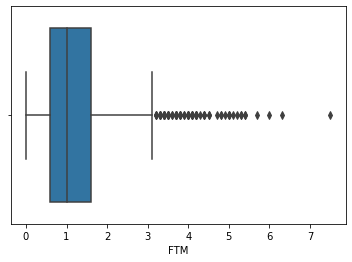

In [24]:
sns.boxplot(df['FTM'])

In [25]:
df['FTM'].sort_values(ascending=False).head()

118     7.5
1312    6.3
490     6.0
1310    5.7
1192    5.4
Name: FTM, dtype: float64

In [26]:
df = df[df['FTM'] <=7.0 ]
df.shape

(1318, 20)

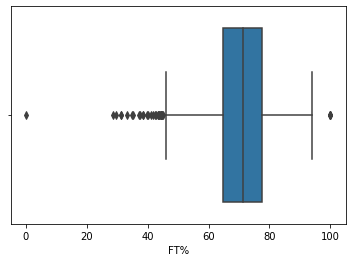

In [27]:
sns.boxplot(df['FT%'])

In [28]:
df['FT%'].sort_values(ascending=True).head()

809     0.0
12     28.6
887    29.6
441    31.3
485    31.3
Name: FT%, dtype: float64

In [29]:
df = df[df['FT%'] >=20.0 ]
df.shape

(1317, 20)

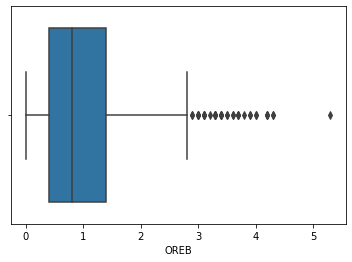

In [30]:
sns.boxplot(df['OREB'])

In [31]:
df['OREB'].sort_values(ascending=False).head()

538     5.3
442     4.3
1055    4.3
443     4.2
491     4.2
Name: OREB, dtype: float64

In [32]:
df = df[df['OREB'] <=5.0 ]
df.shape

(1316, 20)

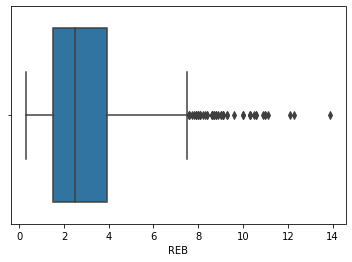

In [33]:
sns.boxplot(df['REB'])

In [34]:
df['REB'].sort_values(ascending=False).head(20)

1308    13.9
491     12.3
666     12.1
400     11.1
18      11.0
19      11.0
889     10.9
442     10.6
443     10.6
719     10.5
1093    10.3
65      10.3
1312    10.3
1055    10.0
891     10.0
1311     9.6
536      9.3
497      9.3
748      9.1
1270     9.1
Name: REB, dtype: float64

In [35]:
df = df[df['REB'] <=13.0 ]
df.shape

(1315, 20)

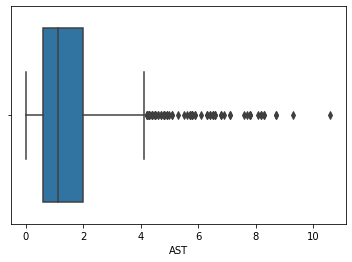

In [36]:
sns.boxplot(df['AST'])

In [37]:
df['AST'].sort_values(ascending=False).head()

236     10.6
1190     9.3
121      8.7
120      8.7
667      8.3
Name: AST, dtype: float64

In [38]:
df = df[df['AST'] <=10.0 ]
df.shape

(1314, 20)

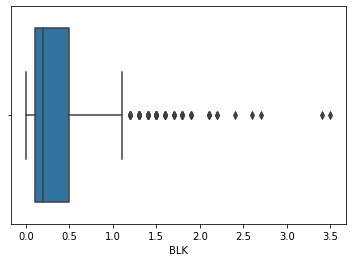

In [39]:
sns.boxplot(df['BLK'])

In [40]:
df['BLK'].sort_values(ascending=False).head(10)

1312    3.5
458     3.4
354     2.7
318     2.6
400     2.4
496     2.2
1270    2.2
314     2.1
274     2.1
1163    2.1
Name: BLK, dtype: float64

In [41]:
df = df[df['BLK'] <=3.0 ]
df.shape

(1312, 20)

# Feature Selection

In [42]:
X = df.drop('TARGET_5Yrs', axis=1)
y = df['TARGET_5Yrs']

In [43]:
X_vars = df.drop('TARGET_5Yrs', axis=1)
X_vars = sm.add_constant(X_vars)
X_vars_train, X_vars_test, y_train, y_test = train_test_split(X_vars, y, test_size=0.25)

In [44]:
mod = sm.OLS(y, X_vars)
res = mod.fit()
print(res.summary())

                            OLS Regression Results                            
Dep. Variable:            TARGET_5Yrs   R-squared:                       0.205
Model:                            OLS   Adj. R-squared:                  0.194
Method:                 Least Squares   F-statistic:                     17.57
Date:                Tue, 17 Nov 2020   Prob (F-statistic):           3.45e-52
Time:                        01:18:30   Log-Likelihood:                -764.29
No. Observations:                1312   AIC:                             1569.
Df Residuals:                    1292   BIC:                             1672.
Df Model:                          19                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const         -0.6273      0.228     -2.757      0.0

### Features we got from OLS Regression

| Feature | p-value |
| --- | --- |
| GP | 0.000 |
| FGA | 0.047 |
| FG% | 0.010 |
| 3P Made | 0.006 |
| 3PA | 0.002 |
| AST | 0.015 |
| BLK | (Barely qulaifies)0.054 |
| constant | 0.006 |

# Notes - 
##### 1. R-squared close to 1 and R-squared close to Adjusted R-square indicates that the features are relevant to target.
##### 2. Intercept only model: constant column with no other column
##### 3. Specified model: All the features i.e., all the columns other than constant column.
##### 4. Null-Hypothesis:(In case of F-Statistic): These 2 models are equal.
##### 5. Alternate Hypothesis: Intercept only model is worse than specified model(our model).

### F-statistic:
##### 1. If p-value is close to 0 and f-statistic value is really large then we can reject null hypothesis.
##### 2. In our case p-value is close to 0 and f-statistic value is large but not that large. We can reject null hypothesis i.e., the specified model(our model) fits the data better than the intercept only model(model with no columns/features except for constants). 

##### 3. f-statistic >1, p-value close to 0 and p- value < 0.05 indicates that the features are closely related to the target variable.

### T-statistic:
##### 1. Null-Hypothesis: the corresponding features coefficient value is going to be equal to 0.
##### 2. Alternate-Hypothesis: the corresponding features coefficient value will not be equal to 0.
##### 3. Here P>|t| means p-value of t-test
##### 4. Here t means t-value
##### 5. The higher the t-value the greater the chances that you reject the null hypothesis & you accept the alternate hypothesis.
##### 6. If p-value is lower (i.e., p<0.05) then we reject the null hypothesis.
##### 7. Rejecting null hypothesis means the coefficient value is non-zero.
##### 8. Accepting null hypothesis means the coefficient value of a feature will be 0 i.e., feature will be irrelevant.


In [45]:
mod = sm.Logit(y, X_vars)
res = mod.fit()
print(res.summary())

Optimization terminated successfully.
         Current function value: 0.551663
         Iterations 6
                           Logit Regression Results                           
Dep. Variable:            TARGET_5Yrs   No. Observations:                 1312
Model:                          Logit   Df Residuals:                     1292
Method:                           MLE   Df Model:                           19
Date:                Tue, 17 Nov 2020   Pseudo R-squ.:                  0.1708
Time:                        01:18:30   Log-Likelihood:                -723.78
converged:                       True   LL-Null:                       -872.92
Covariance Type:            nonrobust   LLR p-value:                 4.526e-52
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
const         -4.5880      1.263     -3.634      0.000      -7.063      -2.113
GP             0.0372      0.

### Features we got from Logistic Regression (i.e., p < 0.05)

| Feature | p-value |
| --- | --- |
| GP | 0.000 |
| 3P Made | 0.008 |
| 3PA | 0.002 |
| AST | 0.005 |
| BLK | (Barely qualifies)0.053 |
| constant | 0.000 |

# Notes-

#### The same rules from OLS Regression applies for Logistic Regression with a slight change where the t-value is replaced with z-value.

In [46]:
mod = sm.Logit(y, X_vars)
res = mod.fit(method = 'newton')
print(res.summary())

Optimization terminated successfully.
         Current function value: 0.551663
         Iterations 6
                           Logit Regression Results                           
Dep. Variable:            TARGET_5Yrs   No. Observations:                 1312
Model:                          Logit   Df Residuals:                     1292
Method:                           MLE   Df Model:                           19
Date:                Tue, 17 Nov 2020   Pseudo R-squ.:                  0.1708
Time:                        01:18:30   Log-Likelihood:                -723.78
converged:                       True   LL-Null:                       -872.92
Covariance Type:            nonrobust   LLR p-value:                 4.526e-52
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
const         -4.5880      1.263     -3.634      0.000      -7.063      -2.113
GP             0.0372      0.

##### Logit Newton 

| Feature | p-value |
| --- | --- |
| GP | 0.000 |
| 3P Made | 0.008 |
| 3PA | 0.002 |
| AST | 0.005 |
| BLK | (Barely qualifies)0.053 |
| constant | 0.000 |

#### Methods for Logistic Regression 
##### methods = ['newton'(default), bfgs, lbfgs, powell, cg, ncg, basinhopping, minimize] 

In [47]:
mod = sm.Logit(y, X_vars)
res = mod.fit(method = 'bfgs')
print(res.summary())

         Current function value: 0.557438
         Iterations: 35
         Function evaluations: 40
         Gradient evaluations: 40
                           Logit Regression Results                           
Dep. Variable:            TARGET_5Yrs   No. Observations:                 1312
Model:                          Logit   Df Residuals:                     1292
Method:                           MLE   Df Model:                           19
Date:                Tue, 17 Nov 2020   Pseudo R-squ.:                  0.1622
Time:                        01:18:30   Log-Likelihood:                -731.36
converged:                      False   LL-Null:                       -872.92
Covariance Type:            nonrobust   LLR p-value:                 5.691e-49
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
const         -1.0070      1.242     -0.811      0.418      -3.442       1.4

C:\Users\rahul\anaconda3\lib\site-packages\statsmodels\base\model.py:568: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)


##### Logit Bfgs 

| Feature | p-value |
| --- | --- |
| GP | 0.000 |
| AST | 0.001 |
| BLK | 0.011 |

In [48]:
mod = sm.Logit(y, X_vars)
res = mod.fit(method = 'lbfgs')
print(res.summary())

                           Logit Regression Results                           
Dep. Variable:            TARGET_5Yrs   No. Observations:                 1312
Model:                          Logit   Df Residuals:                     1292
Method:                           MLE   Df Model:                           19
Date:                Tue, 17 Nov 2020   Pseudo R-squ.:                  0.1323
Time:                        01:18:30   Log-Likelihood:                -757.41
converged:                      False   LL-Null:                       -872.92
Covariance Type:            nonrobust   LLR p-value:                 2.119e-38
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
const         -0.0241      1.206     -0.020      0.984      -2.389       2.341
GP             0.0351      0.005      7.554      0.000       0.026       0.044
MIN           -0.0582      0.033     -1.779      0.0

C:\Users\rahul\anaconda3\lib\site-packages\statsmodels\base\model.py:568: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)


##### Logit Lbfgs 

| Feature | p-value |
| --- | --- |
| GP | 0.000 |

In [49]:
mod = sm.Logit(y, X_vars)
res = mod.fit(method = 'powell')
print(res.summary())

Optimization terminated successfully.
         Current function value: 0.555939
         Iterations: 14
         Function evaluations: 3265
                           Logit Regression Results                           
Dep. Variable:            TARGET_5Yrs   No. Observations:                 1312
Model:                          Logit   Df Residuals:                     1292
Method:                           MLE   Df Model:                           19
Date:                Tue, 17 Nov 2020   Pseudo R-squ.:                  0.1644
Time:                        01:18:31   Log-Likelihood:                -729.39
converged:                       True   LL-Null:                       -872.92
Covariance Type:            nonrobust   LLR p-value:                 8.946e-50
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
const         -1.1934      1.235     -0.967      0.334      -3.614    

##### Logit Powell 

| Feature | p-value |
| --- | --- |
| GP | 0.000 |
| 3P Made | 0.038 |
| 3PA | 0.006 |
| AST | 0.041 |

In [50]:
mod = sm.Logit(y, X_vars)
res = mod.fit(method = 'cg')
print(res.summary())

         Current function value: 0.576157
         Iterations: 35
         Function evaluations: 81
         Gradient evaluations: 81
                           Logit Regression Results                           
Dep. Variable:            TARGET_5Yrs   No. Observations:                 1312
Model:                          Logit   Df Residuals:                     1292
Method:                           MLE   Df Model:                           19
Date:                Tue, 17 Nov 2020   Pseudo R-squ.:                  0.1340
Time:                        01:18:31   Log-Likelihood:                -755.92
converged:                      False   LL-Null:                       -872.92
Covariance Type:            nonrobust   LLR p-value:                 5.291e-39
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
const         -0.0341      1.213     -0.028      0.978      -2.412       2.3

C:\Users\rahul\anaconda3\lib\site-packages\statsmodels\base\model.py:568: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)


##### Logit Cg 

| Feature | p-value |
| --- | --- |
| GP | 0.000 |
| MIN | 0.035 |

In [51]:
mod = sm.Logit(y, X_vars)
res = mod.fit(method = 'ncg')
print(res.summary())

Optimization terminated successfully.
         Current function value: 0.558943
         Iterations: 13
         Function evaluations: 21
         Gradient evaluations: 33
         Hessian evaluations: 13
                           Logit Regression Results                           
Dep. Variable:            TARGET_5Yrs   No. Observations:                 1312
Model:                          Logit   Df Residuals:                     1292
Method:                           MLE   Df Model:                           19
Date:                Tue, 17 Nov 2020   Pseudo R-squ.:                  0.1599
Time:                        01:18:31   Log-Likelihood:                -733.33
converged:                       True   LL-Null:                       -872.92
Covariance Type:            nonrobust   LLR p-value:                 3.642e-48
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
const

##### Logit Ncg 

| Feature | p-value |
| --- | --- |
| GP | 0.000 |
| FGA | 0.014 |
| AST | 0.004 |

In [52]:
mod = sm.Logit(y, X_vars)
res = mod.fit(method = 'basinhopping')
print(res.summary())

basinhopping step 0: f 0.551663
basinhopping step 1: f 0.551663 trial_f 0.551663 accepted 1  lowest_f 0.551663
found new global minimum on step 1 with function value 0.551663
basinhopping step 2: f 0.551663 trial_f 0.551663 accepted 1  lowest_f 0.551663
basinhopping step 3: f 0.551663 trial_f 0.551663 accepted 1  lowest_f 0.551663
found new global minimum on step 3 with function value 0.551663
basinhopping step 4: f 0.551664 trial_f 0.551664 accepted 1  lowest_f 0.551663
basinhopping step 5: f 0.551664 trial_f 0.551664 accepted 1  lowest_f 0.551663
basinhopping step 6: f 0.551663 trial_f 0.551663 accepted 1  lowest_f 0.551663
basinhopping step 7: f 0.551663 trial_f 0.551663 accepted 1  lowest_f 0.551663
basinhopping step 8: f 0.551663 trial_f 0.551663 accepted 1  lowest_f 0.551663
basinhopping step 9: f 0.551663 trial_f 0.551663 accepted 1  lowest_f 0.551663
basinhopping step 10: f 0.551664 trial_f 0.551664 accepted 1  lowest_f 0.551663
basinhopping step 11: f 0.551665 trial_f 0.551665

adaptive stepsize: acceptance rate 0.990000 target 0.500000 new stepsize 0.617284 old stepsize 0.555556
basinhopping step 100: f 0.551664 trial_f 0.551664 accepted 1  lowest_f 0.551663
                           Logit Regression Results                           
Dep. Variable:            TARGET_5Yrs   No. Observations:                 1312
Model:                          Logit   Df Residuals:                     1292
Method:                           MLE   Df Model:                           19
Date:                Tue, 17 Nov 2020   Pseudo R-squ.:                  0.1708
Time:                        01:18:34   Log-Likelihood:                -723.78
converged:                       True   LL-Null:                       -872.92
Covariance Type:            nonrobust   LLR p-value:                 4.526e-52
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
const         -4.5897    

##### Logit Basinhopping 

| Feature | p-value |
| --- | --- |
| GP | 0.000 |
| 3P Made | 0.008 |
| 3PA | 0.002 |
| AST | 0.005|
| BLK | (Barely qualifies)0.053 |
| constant | 0.000 |

In [53]:
mod = sm.Logit(y, X_vars)
res = mod.fit(method = 'minimize')
print(res.summary())

         Current function value: 0.557438
         Iterations: 35
         Function evaluations: 40
         Gradient evaluations: 40
                           Logit Regression Results                           
Dep. Variable:            TARGET_5Yrs   No. Observations:                 1312
Model:                          Logit   Df Residuals:                     1292
Method:                           MLE   Df Model:                           19
Date:                Tue, 17 Nov 2020   Pseudo R-squ.:                  0.1622
Time:                        01:18:34   Log-Likelihood:                -731.36
converged:                      False   LL-Null:                       -872.92
Covariance Type:            nonrobust   LLR p-value:                 5.691e-49
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
const         -1.0070      1.242     -0.811      0.418      -3.442       1.4

C:\Users\rahul\anaconda3\lib\site-packages\statsmodels\base\model.py:568: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)


##### Logit Minimize 

| Feature | p-value |
| --- | --- |
| GP | 0.000 |
| AST | 0.001|
| BLK | 0.011 |

## We can see that newton and basinhopping have same features and p-values. So we are gonna select these features for modeling from Logistic Regression. They are: 

| Feature | p-value |
| --- | --- |
| GP | 0.000 |
| 3P Made | 0.008 |
| 3PA | 0.002 |
| AST | 0.005|
| BLK | (Barely qualifies)0.053 |
| constant | 0.000 |

In [54]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=11)

In [55]:
from sklearn.feature_selection import SelectKBest
from sklearn.feature_selection import VarianceThreshold, RFE, SelectFromModel, SelectKBest, f_classif, chi2, mutual_info_classif

In [56]:
X_train.shape

(984, 19)

### Removing features with low variance 

In [57]:
sel_variance_threshold = VarianceThreshold() 
X_train_remove_variance = sel_variance_threshold.fit_transform(X_train)
X_train_remove_variance.shape

(984, 19)

#### The data still has 19 features, so no feature is removed.

# Feature selection using SelectKBest

In [58]:
bestfeatures1 = SelectKBest(score_func = chi2, k = 10)
fit1 = bestfeatures1.fit(X_train,y_train)
dfscores1 = pd.DataFrame(fit1.scores_)
dfcolumns1 = pd.DataFrame(X_train.columns)

featureScores1 = pd.concat([dfcolumns1,dfscores1],axis=1)
featureScores1.columns = ['Features','Score']  
print("\nFrom 'chi2' score-function\n\n", featureScores1.nlargest(10,'Score')) 


From 'chi2' score-function

    Features       Score
0        GP  730.428324
1       MIN  315.469383
2       PTS  223.987686
4       FGA  147.463620
14      REB  105.073961
3       FGM   87.975609
10      FTA   72.112447
13     DREB   60.915314
9       FTM   54.639543
5       FG%   47.700707


In [59]:
bestfeatures2 = SelectKBest(score_func = f_classif, k=10)
fit2 = bestfeatures2.fit(X_train,y_train)
dfscores2 = pd.DataFrame(fit2.scores_)
dfcolumns2 = pd.DataFrame(X_train.columns)

featureScores2 = pd.concat([dfcolumns2,dfscores2],axis = 1)
featureScores2.columns = ['Features','Score']  
print("\nFrom 'f_classif' score-function\n\n", featureScores2.nlargest(10,'Score')) 


From 'f_classif' score-function

    Features       Score
0        GP  172.494989
3       FGM   92.504370
2       PTS   91.382153
1       MIN   88.691227
10      FTA   87.183422
14      REB   84.673581
9       FTM   84.388287
12     OREB   84.230517
4       FGA   73.845814
13     DREB   73.761657


In [60]:
bestfeatures3 = SelectKBest(score_func = mutual_info_classif, k=10)
fit3 = bestfeatures3.fit(X_train,y_train)
dfscores3 = pd.DataFrame(fit3.scores_)
dfcolumns3 = pd.DataFrame(X_train.columns)

featureScores3 = pd.concat([dfcolumns3,dfscores3],axis = 1)
featureScores3.columns = ['Features','Score']  
print("\nFrom 'mutual_info_classif' score-function\n\n", featureScores3.nlargest(10,'Score')) 


From 'mutual_info_classif' score-function

    Features     Score
3       FGM  0.075798
0        GP  0.063791
9       FTM  0.059927
2       PTS  0.055446
14      REB  0.048987
12     OREB  0.041619
10      FTA  0.041378
1       MIN  0.040952
18      TOV  0.033067
13     DREB  0.032396


#### score_func = ['f_classif', 'mutual_info_classif', 'chi2', 'f_regression', 'mutual_info_regression', 'SelectPercentile', 'SelectFpr', 'SelectFdr', 'SelectFwe', 'GenericUnivariateSelect'] 

# Recursive feature elimination

In [61]:
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import confusion_matrix, classification_report
from sklearn.metrics import accuracy_score

In [62]:
model_logistic = LogisticRegression(solver='lbfgs', multi_class='multinomial', max_iter=1000)
sel_rfe_logistic = RFE(estimator=model_logistic, n_features_to_select=10, step=1)
X_train_rfe_logistic = sel_rfe_logistic.fit_transform(X_train, y_train)

C:\Users\rahul\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:940: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)


In [63]:
print(sel_rfe_logistic.get_support())
print(sel_rfe_logistic.get_params())

[False False False  True  True False  True  True False  True  True False
  True False False  True  True  True False]
{'estimator__C': 1.0, 'estimator__class_weight': None, 'estimator__dual': False, 'estimator__fit_intercept': True, 'estimator__intercept_scaling': 1, 'estimator__l1_ratio': None, 'estimator__max_iter': 1000, 'estimator__multi_class': 'multinomial', 'estimator__n_jobs': None, 'estimator__penalty': 'l2', 'estimator__random_state': None, 'estimator__solver': 'lbfgs', 'estimator__tol': 0.0001, 'estimator__verbose': 0, 'estimator__warm_start': False, 'estimator': LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=1000,
                   multi_class='multinomial', n_jobs=None, penalty='l2',
                   random_state=None, solver='lbfgs', tol=0.0001, verbose=0,
                   warm_start=False), 'n_features_to_select': 10, 'step': 1, 'verbose': 0}


In [64]:
sel_rfe_logistic.ranking_

array([ 7,  6,  8,  1,  1,  5,  1,  1, 10,  1,  1,  9,  1,  2,  3,  1,  1,
        1,  4])

#### Features with only rank 1 are selected. 

In [65]:
print("Features Selected are: ")
for i in range(X_train.shape[1]):
    if sel_rfe_logistic.support_[i] == True:
        print('Column: %s' % (X_train.columns[i]))

Features Selected are: 
Column: FGM
Column: FGA
Column: 3P Made
Column: 3PA
Column: FTM
Column: FTA
Column: OREB
Column: AST
Column: STL
Column: BLK


In [66]:
model_tree = RandomForestClassifier(random_state=100, n_estimators=50)
sel_rfe_tree = RFE(estimator=model_tree, n_features_to_select=10, step=1)
X_train_rfe_tree = sel_rfe_tree.fit_transform(X_train, y_train)

In [67]:
print(sel_rfe_tree.get_support())
print(sel_rfe_tree.get_params())

[ True  True  True False  True  True False False False  True  True  True
 False False  True  True False False False]
{'estimator__bootstrap': True, 'estimator__ccp_alpha': 0.0, 'estimator__class_weight': None, 'estimator__criterion': 'gini', 'estimator__max_depth': None, 'estimator__max_features': 'auto', 'estimator__max_leaf_nodes': None, 'estimator__max_samples': None, 'estimator__min_impurity_decrease': 0.0, 'estimator__min_impurity_split': None, 'estimator__min_samples_leaf': 1, 'estimator__min_samples_split': 2, 'estimator__min_weight_fraction_leaf': 0.0, 'estimator__n_estimators': 50, 'estimator__n_jobs': None, 'estimator__oob_score': False, 'estimator__random_state': 100, 'estimator__verbose': 0, 'estimator__warm_start': False, 'estimator': RandomForestClassifier(bootstrap=True, ccp_alpha=0.0, class_weight=None,
                       criterion='gini', max_depth=None, max_features='auto',
                       max_leaf_nodes=None, max_samples=None,
                       min_im

In [68]:
sel_rfe_tree.ranking_

array([ 1,  1,  1,  3,  1,  1, 10,  6,  5,  1,  1,  1,  2,  4,  1,  1,  9,
        8,  7])

In [69]:
print("Features Selected are: ")
for i in range(X_train.shape[1]):
    if sel_rfe_tree.support_[i] == True:
        print('Column: %s' % (X_train.columns[i]))

Features Selected are: 
Column: GP
Column: MIN
Column: PTS
Column: FGA
Column: FG%
Column: FTM
Column: FTA
Column: FT%
Column: REB
Column: AST


# Feature selection using SelectFromModel

### (1) L1-based feature selection

In [70]:
model_logistic = LogisticRegression(solver='saga', multi_class='multinomial', max_iter=10000, penalty='l1')
sel_model_logistic = SelectFromModel(estimator=model_logistic)
X_train_sfm_l1 = sel_model_logistic.fit_transform(X_train, y_train)

In [71]:
print(sel_model_logistic.get_support())
print(sel_model_logistic.get_params())

[ True  True  True False  True  True  True  True  True  True  True  True
  True  True False  True  True  True  True]
{'estimator__C': 1.0, 'estimator__class_weight': None, 'estimator__dual': False, 'estimator__fit_intercept': True, 'estimator__intercept_scaling': 1, 'estimator__l1_ratio': None, 'estimator__max_iter': 10000, 'estimator__multi_class': 'multinomial', 'estimator__n_jobs': None, 'estimator__penalty': 'l1', 'estimator__random_state': None, 'estimator__solver': 'saga', 'estimator__tol': 0.0001, 'estimator__verbose': 0, 'estimator__warm_start': False, 'estimator': LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=10000,
                   multi_class='multinomial', n_jobs=None, penalty='l1',
                   random_state=None, solver='saga', tol=0.0001, verbose=0,
                   warm_start=False), 'max_features': None, 'norm_order': 1, 'prefit': False, 'threshold': None}


In [72]:
feature_names = X_train.columns
print("Features selected by SelectFromModel: "
      f"{feature_names[sel_model_logistic.get_support()]}")

Features selected by SelectFromModel: Index(['GP', 'MIN', 'PTS', 'FGA', 'FG%', '3P Made', '3PA', '3P%', 'FTM', 'FTA',
       'FT%', 'OREB', 'DREB', 'AST', 'STL', 'BLK', 'TOV'],
      dtype='object')


### (2) Tree-based feature selection

In [73]:
from sklearn.ensemble import ExtraTreesClassifier

In [74]:
model_tree = ExtraTreesClassifier(random_state=100, n_estimators=50)
model_tree.fit(X_train, y_train)
print(model_tree.feature_importances_)

sel_model_tree = SelectFromModel(estimator=model_tree, prefit=True, threshold='mean')
X_train_sfm_tree = sel_model_tree.transform(X_train)

[0.09583504 0.05336147 0.05921336 0.05435793 0.04830798 0.06062864
 0.03063386 0.04315281 0.04378697 0.05529345 0.05039769 0.04992243
 0.05490673 0.05167443 0.05884954 0.04842301 0.04497474 0.04562186
 0.05065805]


In [75]:
print(sel_model_tree.get_support())
print(sel_model_tree.get_params())

[ True  True  True  True False  True False False False  True False False
  True False  True False False False False]
{'estimator__bootstrap': False, 'estimator__ccp_alpha': 0.0, 'estimator__class_weight': None, 'estimator__criterion': 'gini', 'estimator__max_depth': None, 'estimator__max_features': 'auto', 'estimator__max_leaf_nodes': None, 'estimator__max_samples': None, 'estimator__min_impurity_decrease': 0.0, 'estimator__min_impurity_split': None, 'estimator__min_samples_leaf': 1, 'estimator__min_samples_split': 2, 'estimator__min_weight_fraction_leaf': 0.0, 'estimator__n_estimators': 50, 'estimator__n_jobs': None, 'estimator__oob_score': False, 'estimator__random_state': 100, 'estimator__verbose': 0, 'estimator__warm_start': False, 'estimator': ExtraTreesClassifier(bootstrap=False, ccp_alpha=0.0, class_weight=None,
                     criterion='gini', max_depth=None, max_features='auto',
                     max_leaf_nodes=None, max_samples=None,
                     min_impurity

In [76]:
feature_names = X_train.columns
print("Features selected by SelectFromModel: "
      f"{feature_names[sel_model_tree.get_support()]}")

Features selected by SelectFromModel: Index(['GP', 'MIN', 'PTS', 'FGM', 'FG%', 'FTM', 'OREB', 'REB'], dtype='object')


# Optimiztion

### Doing with models that got highest accuracy from each area

### All Features

In [77]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.25, random_state = 11)

### Before Standardization

### Model - Logistic Regression

In [78]:
from sklearn.linear_model import LogisticRegression

lr_bs_af =  LogisticRegression(random_state = 11)
lr_bs_af.fit(X_train, y_train)
y_pred = lr_bs_af.predict(X_test)

print(confusion_matrix(y_test, y_pred))
print(classification_report(y_test, y_pred))

lr_bs_af_score = round(lr_bs_af.score(X_train, y_train) * 100, 2)
lr_bs_af_score_test = round(lr_bs_af.score(X_test, y_test) * 100, 2)
print('Score: \n', lr_bs_af_score)
print('Test Score: \n', lr_bs_af_score_test)
print('Accuracy: \n', accuracy_score(y_test, y_pred))

[[ 68  61]
 [ 36 163]]
              precision    recall  f1-score   support

         0.0       0.65      0.53      0.58       129
         1.0       0.73      0.82      0.77       199

    accuracy                           0.70       328
   macro avg       0.69      0.67      0.68       328
weighted avg       0.70      0.70      0.70       328

Score: 
 70.73
Test Score: 
 70.43
Accuracy: 
 0.7042682926829268


C:\Users\rahul\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:940: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)


### GridSearch CV

In [79]:
kfold = StratifiedKFold(n_splits=5)

param_grid = [
    {'penalty' : ['l1', 'l2'],
    'C': np.logspace(-4, 4, 20),
    'solver' : ['lbfgs','newton-cg','liblinear','sag','saga'],
    'max_iter' : [100, 1000,2500, 5000]}
]

lr_bs_af_gscv = GridSearchCV(lr_bs_af, param_grid = param_grid, cv = kfold, verbose=True, n_jobs=-1)
best_lr_bs_af_gscv = lr_bs_af_gscv.fit(X_train, y_train)

print(best_lr_bs_af_gscv.best_estimator_.get_params(), '\n')
print('Model accuracy is',best_lr_bs_af_gscv.score(X_test, y_test))

[Parallel(n_jobs=-1)]: Using backend LokyBackend with 8 concurrent workers.


Fitting 5 folds for each of 800 candidates, totalling 4000 fits


[Parallel(n_jobs=-1)]: Done  34 tasks      | elapsed:    1.9s
[Parallel(n_jobs=-1)]: Done 811 tasks      | elapsed:   16.7s
[Parallel(n_jobs=-1)]: Done 1591 tasks      | elapsed:   30.9s
[Parallel(n_jobs=-1)]: Done 2384 tasks      | elapsed:   59.2s
[Parallel(n_jobs=-1)]: Done 3098 tasks      | elapsed:  1.6min


{'C': 4.281332398719396, 'class_weight': None, 'dual': False, 'fit_intercept': True, 'intercept_scaling': 1, 'l1_ratio': None, 'max_iter': 100, 'multi_class': 'auto', 'n_jobs': None, 'penalty': 'l2', 'random_state': 11, 'solver': 'newton-cg', 'tol': 0.0001, 'verbose': 0, 'warm_start': False} 

Model accuracy is 0.7195121951219512


[Parallel(n_jobs=-1)]: Done 4000 out of 4000 | elapsed:  2.5min finished


In [80]:
import sklearn.metrics as metrics

probs = best_lr_bs_af_gscv.predict_proba(X_test)
preds = probs[:,1]

fpr, tpr, threshold = metrics.roc_curve(y_test, preds)
roc_auc = metrics.auc(fpr, tpr)

classes = best_lr_bs_af_gscv.predict(X_test)
    
accuracy = metrics.accuracy_score(classes, y_test)
    
balanced_accuracy = metrics.balanced_accuracy_score(classes, y_test)

precision = metrics.precision_score(classes, y_test)
    
average_precision = metrics.average_precision_score(classes, y_test)
    
f1_score = metrics.f1_score(classes, y_test)
    
recall = metrics.recall_score(classes, y_test)

print ("\n Accuracy          : ", accuracy, "\n Balanced Accuracy : ", balanced_accuracy, "\n Precision         : ", precision, "\n Average Precision : ", average_precision, "\n F1-Score          : ", f1_score, "\n Recall            : ", recall, "\n ROC-AUC           : ", roc_auc, "\n")

print(metrics.classification_report(classes, y_test))


 Accuracy          :  0.7195121951219512 
 Balanced Accuracy :  0.7121752880054213 
 Precision         :  0.8542713567839196 
 Average Precision :  0.8153612851234082 
 F1-Score          :  0.787037037037037 
 Recall            :  0.7296137339055794 
 ROC-AUC           :  0.7886720423824548 

              precision    recall  f1-score   support

         0.0       0.51      0.69      0.59        95
         1.0       0.85      0.73      0.79       233

    accuracy                           0.72       328
   macro avg       0.68      0.71      0.69       328
weighted avg       0.76      0.72      0.73       328



### RandomSearch CV

In [81]:
kfold = StratifiedKFold(n_splits=5)

param_grid = [
    {'penalty' : ['l1', 'l2'],
    'C': np.logspace(-4, 4, 20),
    'solver' : ['lbfgs','newton-cg','liblinear','sag','saga'],
    'max_iter' : [100, 1000,2500, 5000]}
]

lr_bs_af_rscv = RandomizedSearchCV(lr_bs_af, param_distributions = param_grid, cv = kfold, verbose=True, n_jobs=-1, random_state = 11)
best_lr_bs_af_rscv = lr_bs_af_rscv.fit(X_train, y_train)

print(best_lr_bs_af_rscv.best_estimator_.get_params(), '\n')
print('Model accuracy is',best_lr_bs_af_rscv.score(X_test, y_test))

Fitting 5 folds for each of 10 candidates, totalling 50 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 8 concurrent workers.


{'C': 0.615848211066026, 'class_weight': None, 'dual': False, 'fit_intercept': True, 'intercept_scaling': 1, 'l1_ratio': None, 'max_iter': 1000, 'multi_class': 'auto', 'n_jobs': None, 'penalty': 'l2', 'random_state': 11, 'solver': 'newton-cg', 'tol': 0.0001, 'verbose': 0, 'warm_start': False} 

Model accuracy is 0.725609756097561


[Parallel(n_jobs=-1)]: Done  50 out of  50 | elapsed:    4.6s finished


In [82]:
import sklearn.metrics as metrics

probs = best_lr_bs_af_rscv.predict_proba(X_test)
preds = probs[:,1]

fpr, tpr, threshold = metrics.roc_curve(y_test, preds)
roc_auc = metrics.auc(fpr, tpr)

classes = best_lr_bs_af_rscv.predict(X_test)
    
accuracy = metrics.accuracy_score(classes, y_test)
    
balanced_accuracy = metrics.balanced_accuracy_score(classes, y_test)

precision = metrics.precision_score(classes, y_test)
    
average_precision = metrics.average_precision_score(classes, y_test)
    
f1_score = metrics.f1_score(classes, y_test)
    
recall = metrics.recall_score(classes, y_test)

print ("\n Accuracy          : ", accuracy, "\n Balanced Accuracy : ", balanced_accuracy, "\n Precision         : ", precision, "\n Average Precision : ", average_precision, "\n F1-Score          : ", f1_score, "\n Recall            : ", recall, "\n ROC-AUC           : ", roc_auc, "\n")

print(metrics.classification_report(classes, y_test))


 Accuracy          :  0.725609756097561 
 Balanced Accuracy :  0.7184808318828937 
 Precision         :  0.8542713567839196 
 Average Precision :  0.8146601580386358 
 F1-Score          :  0.7906976744186045 
 Recall            :  0.7359307359307359 
 ROC-AUC           :  0.7848155506213237 

              precision    recall  f1-score   support

         0.0       0.53      0.70      0.60        97
         1.0       0.85      0.74      0.79       231

    accuracy                           0.73       328
   macro avg       0.69      0.72      0.70       328
weighted avg       0.76      0.73      0.73       328



### Bayesian Optimization

In [83]:
from hyperopt import fmin, tpe, hp, STATUS_OK, Trials
import sklearn

In [84]:
import warnings
warnings.filterwarnings('ignore')

In [85]:
def f(params):
    acc = hyperopt_train_test(params)
    return {'loss': -acc, 'status': STATUS_OK}

def hyperopt_train_test(params):
    lr_bs_af_bo = LogisticRegression(**params, random_state = 11)
    return sklearn.model_selection.cross_val_score(lr_bs_af_bo, X_train, y_train).mean()

param_grid = {
    'C': hp.uniform('C', 0, 20),
    'penalty': hp.choice('penalty', ['l1', 'l2']),
    'solver': hp.choice('solver', ['lbfgs','newton-cg','liblinear','sag','saga']),
    'max_iter' : hp.choice('max_iter', [100, 1000,2500, 5000])
}

trials = Trials()
best = fmin(f, param_grid, algo=tpe.suggest, max_evals=100, trials=trials)
print('best:')
print(best)
print("Accuracy : ", -trials.best_trial['result']['loss']*100)

100%|█████████████████████████████████████████████| 100/100 [00:17<00:00,  5.82trial/s, best loss: -0.7033046721226561]
best:
{'C': 9.256221100460834, 'max_iter': 2, 'penalty': 1, 'solver': 0}
Accuracy :  70.33046721226562


### After Standardization

In [86]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.25, random_state = 11)

In [87]:
train_mean = X_train.mean()
train_std = X_train.std()

In [88]:
X_train = (X_train - train_mean) / train_std

In [89]:
X_train.describe()

,GP,MIN,PTS,FGM,FGA,FG%,3P Made,3PA,3P%,FTM,FTA,FT%,OREB,DREB,REB,AST,STL,BLK,TOV
count,9.840000e+02,9.840000e+02,9.840000e+02,9.840000e+02,9.840000e+02,9.840000e+02,9.840000e+02,9.840000e+02,9.840000e+02,9.840000e+02,9.840000e+02,9.840000e+02,9.840000e+02,9.840000e+02,9.840000e+02,9.840000e+02,9.840000e+02,9.840000e+02,9.840000e+02
mean,3.384826e-17,1.358218e-15,-1.343212e-15,5.451827e-16,-1.886928e-15,-1.311665e-14,1.186043e-15,-1.324370e-15,5.325460e-17,-1.836550e-15,1.356695e-15,6.320035e-15,3.456754e-16,1.510535e-15,-1.996314e-15,6.514662e-16,-5.424748e-16,-2.123866e-15,-7.536880e-17
std,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00
min,-2.845202e+00,-1.629782e+00,-1.420027e+00,-1.399677e+00,-1.424223e+00,-2.812406e+00,-6.520126e-01,-7.413625e-01,-1.228266e+00,-1.239768e+00,-1.328974e+00,-4.085970e+00,-1.308417e+00,-1.353180e+00,-1.342269e+00,-1.053552e+00,-1.523710e+00,-9.190461e-01,-1.506809e+00
25%,-7.655035e-01,-8.168270e-01,-7.364365e-01,-7.308572e-01,-7.461772e-01,-6.568735e-01,-6.520126e-01,-7.413625e-01,-1.228266e+00,-7.107428e-01,-6.973822e-01,-5.492547e-01,-7.801651e-01,-7.531557e-01,-7.448281e-01,-6.398944e-01,-7.777742e-01,-6.653027e-01,-6.663555e-01
50%,1.010378e-01,-1.737431e-01,-2.885666e-01,-3.052447e-01,-2.941470e-01,1.304316e-03,-3.920530e-01,-4.586103e-01,2.082489e-01,-2.875229e-01,-2.236886e-01,8.691529e-02,-2.519129e-01,-2.281343e-01,-2.469605e-01,-2.951796e-01,-2.804839e-01,-4.115594e-01,-2.461287e-01
75%,9.675790e-01,6.392119e-01,4.657407e-01,4.851784e-01,4.686541e-01,6.101188e-01,3.878260e-01,3.896464e-01,8.828287e-01,3.473070e-01,4.079028e-01,6.743366e-01,5.404653e-01,4.468932e-01,4.500541e-01,2.563641e-01,4.654516e-01,3.496707e-01,4.542492e-01
max,1.256426e+00,2.835404e+00,3.812979e+00,3.890078e+00,3.915385e+00,3.637737e+00,4.807140e+00,4.065425e+00,2.078307e+00,5.002726e+00,5.302736e+00,2.875339e+00,4.370294e+00,5.097083e+00,4.632142e+00,5.358143e+00,4.692420e+00,5.932025e+00,4.236290e+00


In [90]:
X_test = (X_test - train_mean) / train_std

In [91]:
X_test.describe()

,GP,MIN,PTS,FGM,FGA,FG%,3P Made,3PA,3P%,FTM,FTA,FT%,OREB,DREB,REB,AST,STL,BLK,TOV
count,328.000000,328.000000,328.000000,328.000000,328.000000,328.000000,328.000000,328.000000,328.000000,328.000000,328.000000,328.000000,328.000000,328.000000,328.000000,328.000000,328.000000,328.000000,328.000000
mean,0.018258,0.000382,0.009606,0.010072,-0.002412,0.033611,-0.056008,-0.056033,-0.000789,0.031505,0.040357,-0.046638,0.047645,0.002592,0.015634,0.018637,0.022742,-0.039454,0.037866
std,1.011584,0.980169,0.984359,0.999085,0.979138,0.983559,0.905094,0.900421,1.005049,0.960512,0.959364,1.047490,1.015325,0.973646,0.992538,0.958121,0.992125,0.987205,0.953656
min,-2.614125,-1.605515,-1.325739,-1.338875,-1.311215,-3.338948,-0.652013,-0.741363,-1.228266,-1.239768,-1.328974,-3.822727,-1.176354,-1.278177,-1.292482,-1.053552,-1.523710,-0.919046,-1.506809
25%,-0.722176,-0.819860,-0.689292,-0.730857,-0.696736,-0.595169,-0.652013,-0.741363,-1.228266,-0.604938,-0.618433,-0.615065,-0.681118,-0.753156,-0.744828,-0.639894,-0.777774,-0.665303,-0.666356
50%,0.216577,-0.191944,-0.264995,-0.305245,-0.294147,-0.039832,-0.392053,-0.458610,0.237367,-0.181718,-0.223689,0.047916,-0.251913,-0.228134,-0.246961,-0.226237,-0.280484,-0.411559,-0.246129
75%,0.967579,0.642245,0.471634,0.485178,0.440402,0.630687,0.127866,0.295396,0.829445,0.453112,0.486852,0.701148,0.672528,0.521896,0.499841,0.342543,0.465452,0.095927,0.454249
max,1.256426,2.362191,4.001556,4.376492,3.632866,3.588374,4.287221,3.876924,3.087750,4.156286,3.644809,2.875339,4.370294,3.672025,3.785767,4.599771,3.946484,5.678281,3.816063


### Model - Logistic Regression 

In [92]:
from sklearn.linear_model import LogisticRegression

lr_as_af =  LogisticRegression(random_state = 11)
lr_as_af.fit(X_train, y_train)
y_pred = lr_as_af.predict(X_test)

print(confusion_matrix(y_test, y_pred))
print(classification_report(y_test, y_pred))

lr_as_af_score = round(lr_as_af.score(X_train, y_train) * 100, 2)
lr_as_af_score_test = round(lr_as_af.score(X_test, y_test) * 100, 2)
print('Score: \n', lr_as_af_score)
print('Test Score: \n', lr_as_af_score_test)
print('Accuracy: \n', accuracy_score(y_test, y_pred))

[[ 67  62]
 [ 28 171]]
              precision    recall  f1-score   support

         0.0       0.71      0.52      0.60       129
         1.0       0.73      0.86      0.79       199

    accuracy                           0.73       328
   macro avg       0.72      0.69      0.69       328
weighted avg       0.72      0.73      0.72       328

Score: 
 71.65
Test Score: 
 72.56
Accuracy: 
 0.725609756097561


### GridSearch CV

In [93]:
kfold = StratifiedKFold(n_splits=5)

param_grid = [
    {'penalty' : ['l1', 'l2'],
    'C': np.logspace(-4, 4, 20),
    'solver' : ['lbfgs','newton-cg','liblinear','sag','saga'],
    'max_iter' : [100, 1000,2500, 5000]}
]

lr_as_af_gscv = GridSearchCV(lr_as_af, param_grid = param_grid, cv = kfold, verbose=True, n_jobs=-1)
best_lr_as_af_gscv = lr_as_af_gscv.fit(X_train, y_train)

print(best_lr_as_af_gscv.best_estimator_.get_params(), '\n')
print('Model accuracy is',best_lr_as_af_gscv.score(X_test, y_test))

Fitting 5 folds for each of 800 candidates, totalling 4000 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 8 concurrent workers.
[Parallel(n_jobs=-1)]: Done  56 tasks      | elapsed:    0.1s
[Parallel(n_jobs=-1)]: Done 2814 tasks      | elapsed:   15.5s
[Parallel(n_jobs=-1)]: Done 3296 tasks      | elapsed:   31.3s


{'C': 0.615848211066026, 'class_weight': None, 'dual': False, 'fit_intercept': True, 'intercept_scaling': 1, 'l1_ratio': None, 'max_iter': 100, 'multi_class': 'auto', 'n_jobs': None, 'penalty': 'l1', 'random_state': 11, 'solver': 'liblinear', 'tol': 0.0001, 'verbose': 0, 'warm_start': False} 

Model accuracy is 0.7164634146341463


[Parallel(n_jobs=-1)]: Done 4000 out of 4000 | elapsed:  1.0min finished


In [94]:
import sklearn.metrics as metrics

probs = best_lr_as_af_gscv.predict_proba(X_test)
preds = probs[:,1]

fpr, tpr, threshold = metrics.roc_curve(y_test, preds)
roc_auc = metrics.auc(fpr, tpr)

classes = best_lr_as_af_gscv.predict(X_test)
    
accuracy = metrics.accuracy_score(classes, y_test)
    
balanced_accuracy = metrics.balanced_accuracy_score(classes, y_test)

precision = metrics.precision_score(classes, y_test)
    
average_precision = metrics.average_precision_score(classes, y_test)
    
f1_score = metrics.f1_score(classes, y_test)
    
recall = metrics.recall_score(classes, y_test)

print ("\n Accuracy          : ", accuracy, "\n Balanced Accuracy : ", balanced_accuracy, "\n Precision         : ", precision, "\n Average Precision : ", average_precision, "\n F1-Score          : ", f1_score, "\n Recall            : ", recall, "\n ROC-AUC           : ", roc_auc, "\n")

print(metrics.classification_report(classes, y_test))


 Accuracy          :  0.7164634146341463 
 Balanced Accuracy :  0.7054919312857887 
 Precision         :  0.8341708542713567 
 Average Precision :  0.7956363947950414 
 F1-Score          :  0.7811764705882354 
 Recall            :  0.7345132743362832 
 ROC-AUC           :  0.7850103229324921 

              precision    recall  f1-score   support

         0.0       0.53      0.68      0.60       102
         1.0       0.83      0.73      0.78       226

    accuracy                           0.72       328
   macro avg       0.68      0.71      0.69       328
weighted avg       0.74      0.72      0.72       328



### RandomSearch CV

In [95]:
kfold = StratifiedKFold(n_splits=5)

param_grid = [
    {'penalty' : ['l1', 'l2'],
    'C': np.logspace(-4, 4, 20),
    'solver' : ['lbfgs','newton-cg','liblinear','sag','saga'],
    'max_iter' : [100, 1000,2500, 5000]}
]

lr_as_af_rscv = RandomizedSearchCV(lr_as_af, param_distributions = param_grid, cv = kfold, verbose=True, n_jobs=-1, random_state = 11)
best_lr_as_af_rscv = lr_as_af_rscv.fit(X_train, y_train)

print(best_lr_as_af_rscv.best_estimator_.get_params(), '\n')
print('Model accuracy is',best_lr_as_af_rscv.score(X_test, y_test))

Fitting 5 folds for each of 10 candidates, totalling 50 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 8 concurrent workers.


{'C': 0.615848211066026, 'class_weight': None, 'dual': False, 'fit_intercept': True, 'intercept_scaling': 1, 'l1_ratio': None, 'max_iter': 1000, 'multi_class': 'auto', 'n_jobs': None, 'penalty': 'l2', 'random_state': 11, 'solver': 'newton-cg', 'tol': 0.0001, 'verbose': 0, 'warm_start': False} 

Model accuracy is 0.725609756097561


[Parallel(n_jobs=-1)]: Done  50 out of  50 | elapsed:    1.5s finished


In [96]:
import sklearn.metrics as metrics

probs = best_lr_as_af_rscv.predict_proba(X_test)
preds = probs[:,1]

fpr, tpr, threshold = metrics.roc_curve(y_test, preds)
roc_auc = metrics.auc(fpr, tpr)

classes = best_lr_as_af_rscv.predict(X_test)
    
accuracy = metrics.accuracy_score(classes, y_test)
    
balanced_accuracy = metrics.balanced_accuracy_score(classes, y_test)

precision = metrics.precision_score(classes, y_test)
    
average_precision = metrics.average_precision_score(classes, y_test)
    
f1_score = metrics.f1_score(classes, y_test)
    
recall = metrics.recall_score(classes, y_test)

print ("\n Accuracy          : ", accuracy, "\n Balanced Accuracy : ", balanced_accuracy, "\n Precision         : ", precision, "\n Average Precision : ", average_precision, "\n F1-Score          : ", f1_score, "\n Recall            : ", recall, "\n ROC-AUC           : ", roc_auc, "\n")

print(metrics.classification_report(classes, y_test))


 Accuracy          :  0.725609756097561 
 Balanced Accuracy :  0.7184808318828937 
 Precision         :  0.8542713567839196 
 Average Precision :  0.8146601580386358 
 F1-Score          :  0.7906976744186045 
 Recall            :  0.7359307359307359 
 ROC-AUC           :  0.786217911261735 

              precision    recall  f1-score   support

         0.0       0.53      0.70      0.60        97
         1.0       0.85      0.74      0.79       231

    accuracy                           0.73       328
   macro avg       0.69      0.72      0.70       328
weighted avg       0.76      0.73      0.73       328



### Bayesian Optimization

In [97]:
from hyperopt import fmin, tpe, hp, STATUS_OK, Trials
import sklearn

In [98]:
import warnings
warnings.filterwarnings('ignore')

In [99]:
def f(params):
    acc = hyperopt_train_test(params)
    return {'loss': -acc, 'status': STATUS_OK}

def hyperopt_train_test(params):
    lr_as_af_bo = LogisticRegression(**params, random_state = 11)
    return sklearn.model_selection.cross_val_score(lr_as_af_bo, X_train, y_train).mean()

param_grid = {
    'C': hp.uniform('C', 0, 20),
    'penalty': hp.choice('penalty', ['l1', 'l2']),
    'solver': hp.choice('solver', ['lbfgs','newton-cg','liblinear','sag','saga']),
    'max_iter' : hp.choice('max_iter', [100, 1000,2500, 5000])
}

trials = Trials()
best = fmin(f, param_grid, algo=tpe.suggest, max_evals=100, trials=trials)
print('best:')
print(best)
print("Accuracy : ", -trials.best_trial['result']['loss']*100)

100%|█████████████████████████████████████████████| 100/100 [00:06<00:00, 15.67trial/s, best loss: -0.7094064021547706]
best:
{'C': 0.43307347584912836, 'max_iter': 3, 'penalty': 1, 'solver': 4}
Accuracy :  70.94064021547706


### 10 Features

In [100]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.25, random_state = 11)

In [101]:
X_train.columns

Index(['GP', 'MIN', 'PTS', 'FGM', 'FGA', 'FG%', '3P Made', '3PA', '3P%', 'FTM',
       'FTA', 'FT%', 'OREB', 'DREB', 'REB', 'AST', 'STL', 'BLK', 'TOV'],
      dtype='object')

In [102]:
X_train = X_train[['FGM', 'REB', 'FTM', 'FTA', 'GP', 'MIN', 'TOV', 'FG%', 'DREB', 'AST']]
X_test = X_test[['FGM', 'REB', 'FTM', 'FTA', 'GP', 'MIN', 'TOV', 'FG%', 'DREB', 'AST']]

### Before Standardization

### Model - Logistic Regression 

In [103]:
from sklearn.linear_model import LogisticRegression

lr_bs_tf =  LogisticRegression(random_state = 11)
lr_bs_tf.fit(X_train, y_train)
y_pred = lr_bs_tf.predict(X_test)

print(confusion_matrix(y_test, y_pred))
print(classification_report(y_test, y_pred))

lr_bs_tf_score = round(lr_bs_tf.score(X_train, y_train) * 100, 2)
lr_bs_tf_score_test = round(lr_bs_tf.score(X_test, y_test) * 100, 2)
print('Score: \n', lr_bs_tf_score)
print('Test Score: \n', lr_bs_tf_score_test)
print('Accuracy: \n', accuracy_score(y_test, y_pred))

[[ 66  63]
 [ 34 165]]
              precision    recall  f1-score   support

         0.0       0.66      0.51      0.58       129
         1.0       0.72      0.83      0.77       199

    accuracy                           0.70       328
   macro avg       0.69      0.67      0.67       328
weighted avg       0.70      0.70      0.70       328

Score: 
 70.83
Test Score: 
 70.43
Accuracy: 
 0.7042682926829268


### GridSearch CV

In [104]:
kfold = StratifiedKFold(n_splits=5)

param_grid = [
    {'penalty' : ['l1', 'l2'],
    'C': np.logspace(-4, 4, 20),
    'solver' : ['lbfgs','newton-cg','liblinear','sag','saga'],
    'max_iter' : [100, 1000,2500, 5000]}
]

lr_bs_tf_gscv = GridSearchCV(lr_bs_tf, param_grid = param_grid, cv = kfold, verbose=True, n_jobs=-1)
best_lr_bs_tf_gscv = lr_bs_tf_gscv.fit(X_train, y_train)

print(best_lr_bs_tf_gscv.best_estimator_.get_params(), '\n')
print('Model accuracy is',best_lr_bs_tf_gscv.score(X_test, y_test))

Fitting 5 folds for each of 800 candidates, totalling 4000 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 8 concurrent workers.
[Parallel(n_jobs=-1)]: Done  62 tasks      | elapsed:    0.2s
[Parallel(n_jobs=-1)]: Done 964 tasks      | elapsed:   13.7s
[Parallel(n_jobs=-1)]: Done 1592 tasks      | elapsed:   26.5s
[Parallel(n_jobs=-1)]: Done 2456 tasks      | elapsed:   43.7s
[Parallel(n_jobs=-1)]: Done 3468 tasks      | elapsed:  1.1min
[Parallel(n_jobs=-1)]: Done 4000 out of 4000 | elapsed:  1.4min finished


{'C': 4.281332398719396, 'class_weight': None, 'dual': False, 'fit_intercept': True, 'intercept_scaling': 1, 'l1_ratio': None, 'max_iter': 2500, 'multi_class': 'auto', 'n_jobs': None, 'penalty': 'l2', 'random_state': 11, 'solver': 'sag', 'tol': 0.0001, 'verbose': 0, 'warm_start': False} 

Model accuracy is 0.7134146341463414


In [105]:
import sklearn.metrics as metrics

probs = best_lr_bs_tf_gscv.predict_proba(X_test)
preds = probs[:,1]

fpr, tpr, threshold = metrics.roc_curve(y_test, preds)
roc_auc = metrics.auc(fpr, tpr)

classes = best_lr_bs_tf_gscv.predict(X_test)
    
accuracy = metrics.accuracy_score(classes, y_test)
    
balanced_accuracy = metrics.balanced_accuracy_score(classes, y_test)

precision = metrics.precision_score(classes, y_test)
    
average_precision = metrics.average_precision_score(classes, y_test)
    
f1_score = metrics.f1_score(classes, y_test)
    
recall = metrics.recall_score(classes, y_test)

print ("\n Accuracy          : ", accuracy, "\n Balanced Accuracy : ", balanced_accuracy, "\n Precision         : ", precision, "\n Average Precision : ", average_precision, "\n F1-Score          : ", f1_score, "\n Recall            : ", recall, "\n ROC-AUC           : ", roc_auc, "\n")

print(metrics.classification_report(classes, y_test))


 Accuracy          :  0.7134146341463414 
 Balanced Accuracy :  0.7022724298861605 
 Precision         :  0.8341708542713567 
 Average Precision :  0.7959860142012306 
 F1-Score          :  0.7793427230046948 
 Recall            :  0.7312775330396476 
 ROC-AUC           :  0.7805695142378559 

              precision    recall  f1-score   support

         0.0       0.53      0.67      0.59       101
         1.0       0.83      0.73      0.78       227

    accuracy                           0.71       328
   macro avg       0.68      0.70      0.69       328
weighted avg       0.74      0.71      0.72       328



### RandomSearch CV

In [106]:
kfold = StratifiedKFold(n_splits=5)

param_grid = [
    {'penalty' : ['l1', 'l2'],
    'C': np.logspace(-4, 4, 20),
    'solver' : ['lbfgs','newton-cg','liblinear','sag','saga'],
    'max_iter' : [100, 1000,2500, 5000]}
]

lr_bs_tf_rscv = RandomizedSearchCV(lr_bs_tf, param_distributions = param_grid, cv = kfold, verbose=True, n_jobs=-1, random_state = 11)
best_lr_bs_tf_rscv = lr_bs_tf_rscv.fit(X_train, y_train)

print(best_lr_bs_tf_rscv.best_estimator_.get_params(), '\n')
print('Model accuracy is',best_lr_bs_tf_rscv.score(X_test, y_test))

Fitting 5 folds for each of 10 candidates, totalling 50 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 8 concurrent workers.
[Parallel(n_jobs=-1)]: Done  35 out of  50 | elapsed:    0.9s remaining:    0.3s
[Parallel(n_jobs=-1)]: Done  50 out of  50 | elapsed:    1.8s finished


{'C': 10000.0, 'class_weight': None, 'dual': False, 'fit_intercept': True, 'intercept_scaling': 1, 'l1_ratio': None, 'max_iter': 5000, 'multi_class': 'auto', 'n_jobs': None, 'penalty': 'l2', 'random_state': 11, 'solver': 'sag', 'tol': 0.0001, 'verbose': 0, 'warm_start': False} 

Model accuracy is 0.7103658536585366


In [107]:
import sklearn.metrics as metrics

probs = best_lr_bs_tf_rscv.predict_proba(X_test)
preds = probs[:,1]

fpr, tpr, threshold = metrics.roc_curve(y_test, preds)
roc_auc = metrics.auc(fpr, tpr)

classes = best_lr_bs_tf_rscv.predict(X_test)
    
accuracy = metrics.accuracy_score(classes, y_test)
    
balanced_accuracy = metrics.balanced_accuracy_score(classes, y_test)

precision = metrics.precision_score(classes, y_test)
    
average_precision = metrics.average_precision_score(classes, y_test)
    
f1_score = metrics.f1_score(classes, y_test)
    
recall = metrics.recall_score(classes, y_test)

print ("\n Accuracy          : ", accuracy, "\n Balanced Accuracy : ", balanced_accuracy, "\n Precision         : ", precision, "\n Average Precision : ", average_precision, "\n F1-Score          : ", f1_score, "\n Recall            : ", recall, "\n ROC-AUC           : ", roc_auc, "\n")

print(metrics.classification_report(classes, y_test))


 Accuracy          :  0.7103658536585366 
 Balanced Accuracy :  0.698377581120944 
 Precision         :  0.8291457286432161 
 Average Precision :  0.7913253673938438 
 F1-Score          :  0.7764705882352942 
 Recall            :  0.7300884955752213 
 ROC-AUC           :  0.7813096490202953 

              precision    recall  f1-score   support

         0.0       0.53      0.67      0.59       102
         1.0       0.83      0.73      0.78       226

    accuracy                           0.71       328
   macro avg       0.68      0.70      0.68       328
weighted avg       0.74      0.71      0.72       328



### Bayesian Optimization

In [108]:
from hyperopt import fmin, tpe, hp, STATUS_OK, Trials
import sklearn

In [109]:
import warnings
warnings.filterwarnings('ignore')

In [110]:
def f(params):
    acc = hyperopt_train_test(params)
    return {'loss': -acc, 'status': STATUS_OK}

def hyperopt_train_test(params):
    lr_bs_tf_bo = LogisticRegression(**params, random_state = 11)
    return sklearn.model_selection.cross_val_score(lr_bs_tf_bo, X_train, y_train).mean()

param_grid = {
    'C': hp.uniform('C', 0, 20),
    'penalty': hp.choice('penalty', ['l1', 'l2']),
    'solver': hp.choice('solver', ['lbfgs','newton-cg','liblinear','sag','saga']),
    'max_iter' : hp.choice('max_iter', [100, 1000,2500, 5000])
}

trials = Trials()
best = fmin(f, param_grid, algo=tpe.suggest, max_evals=100, trials=trials)
print('best:')
print(best)
print("Accuracy : ", -trials.best_trial['result']['loss']*100)

100%|██████████████████████████████████████████████| 100/100 [00:24<00:00,  4.10trial/s, best loss: -0.710426810318036]
best:
{'C': 3.9802952318528035, 'max_iter': 3, 'penalty': 1, 'solver': 3}
Accuracy :  71.0426810318036


### After Standardization

In [111]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.25, random_state = 11)

In [112]:
X_train.columns

Index(['GP', 'MIN', 'PTS', 'FGM', 'FGA', 'FG%', '3P Made', '3PA', '3P%', 'FTM',
       'FTA', 'FT%', 'OREB', 'DREB', 'REB', 'AST', 'STL', 'BLK', 'TOV'],
      dtype='object')

In [113]:
X_train = X_train[['FGM', 'REB', 'FTM', 'FTA', 'GP', 'MIN', 'TOV', 'FG%', 'DREB', 'AST']]
X_test = X_test[['FGM', 'REB', 'FTM', 'FTA', 'GP', 'MIN', 'TOV', 'FG%', 'DREB', 'AST']]

In [114]:
train_mean = X_train.mean()
train_std = X_train.std()

In [115]:
X_train = (X_train - train_mean) / train_std

In [116]:
X_train.describe()

,FGM,REB,FTM,FTA,GP,MIN,TOV,FG%,DREB,AST
count,9.840000e+02,9.840000e+02,9.840000e+02,9.840000e+02,9.840000e+02,9.840000e+02,9.840000e+02,9.840000e+02,9.840000e+02,9.840000e+02
mean,5.451827e-16,-1.996314e-15,-1.836550e-15,1.356695e-15,3.384826e-17,1.358218e-15,-7.536880e-17,-1.311665e-14,1.510535e-15,6.514662e-16
std,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00
min,-1.399677e+00,-1.342269e+00,-1.239768e+00,-1.328974e+00,-2.845202e+00,-1.629782e+00,-1.506809e+00,-2.812406e+00,-1.353180e+00,-1.053552e+00
25%,-7.308572e-01,-7.448281e-01,-7.107428e-01,-6.973822e-01,-7.655035e-01,-8.168270e-01,-6.663555e-01,-6.568735e-01,-7.531557e-01,-6.398944e-01
50%,-3.052447e-01,-2.469605e-01,-2.875229e-01,-2.236886e-01,1.010378e-01,-1.737431e-01,-2.461287e-01,1.304316e-03,-2.281343e-01,-2.951796e-01
75%,4.851784e-01,4.500541e-01,3.473070e-01,4.079028e-01,9.675790e-01,6.392119e-01,4.542492e-01,6.101188e-01,4.468932e-01,2.563641e-01
max,3.890078e+00,4.632142e+00,5.002726e+00,5.302736e+00,1.256426e+00,2.835404e+00,4.236290e+00,3.637737e+00,5.097083e+00,5.358143e+00


In [117]:
X_test = (X_test - train_mean) / train_std

In [118]:
X_test.describe()

,FGM,REB,FTM,FTA,GP,MIN,TOV,FG%,DREB,AST
count,328.000000,328.000000,328.000000,328.000000,328.000000,328.000000,328.000000,328.000000,328.000000,328.000000
mean,0.010072,0.015634,0.031505,0.040357,0.018258,0.000382,0.037866,0.033611,0.002592,0.018637
std,0.999085,0.992538,0.960512,0.959364,1.011584,0.980169,0.953656,0.983559,0.973646,0.958121
min,-1.338875,-1.292482,-1.239768,-1.328974,-2.614125,-1.605515,-1.506809,-3.338948,-1.278177,-1.053552
25%,-0.730857,-0.744828,-0.604938,-0.618433,-0.722176,-0.819860,-0.666356,-0.595169,-0.753156,-0.639894
50%,-0.305245,-0.246961,-0.181718,-0.223689,0.216577,-0.191944,-0.246129,-0.039832,-0.228134,-0.226237
75%,0.485178,0.499841,0.453112,0.486852,0.967579,0.642245,0.454249,0.630687,0.521896,0.342543
max,4.376492,3.785767,4.156286,3.644809,1.256426,2.362191,3.816063,3.588374,3.672025,4.599771


### Model - Logistic Regression 

In [119]:
from sklearn.linear_model import LogisticRegression

lr_as_tf =  LogisticRegression(random_state = 11)
lr_as_tf.fit(X_train, y_train)
y_pred = lr_as_tf.predict(X_test)

print(confusion_matrix(y_test, y_pred))
print(classification_report(y_test, y_pred))

lr_as_tf_score = round(lr_as_tf.score(X_train, y_train) * 100, 2)
lr_as_tf_score_test = round(lr_as_tf.score(X_test, y_test) * 100, 2)
print('Score: \n', lr_as_tf_score)
print('Test Score: \n', lr_as_tf_score_test)
print('Accuracy: \n', accuracy_score(y_test, y_pred))

[[ 69  60]
 [ 32 167]]
              precision    recall  f1-score   support

         0.0       0.68      0.53      0.60       129
         1.0       0.74      0.84      0.78       199

    accuracy                           0.72       328
   macro avg       0.71      0.69      0.69       328
weighted avg       0.72      0.72      0.71       328

Score: 
 72.15
Test Score: 
 71.95
Accuracy: 
 0.7195121951219512


### GridSearch CV

In [120]:
kfold = StratifiedKFold(n_splits=5)

param_grid = [
    {'penalty' : ['l1', 'l2'],
    'C': np.logspace(-4, 4, 20),
    'solver' : ['lbfgs','newton-cg','liblinear','sag','saga'],
    'max_iter' : [100, 1000,2500, 5000]}
]

lr_as_tf_gscv = GridSearchCV(lr_as_tf, param_grid = param_grid, cv = kfold, verbose=True, n_jobs=-1)
best_lr_as_tf_gscv = lr_as_tf_gscv.fit(X_train, y_train)

print(best_lr_as_tf_gscv.best_estimator_.get_params(), '\n')
print('Model accuracy is',best_lr_as_tf_gscv.score(X_test, y_test))

Fitting 5 folds for each of 800 candidates, totalling 4000 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 8 concurrent workers.
[Parallel(n_jobs=-1)]: Done  56 tasks      | elapsed:    0.1s
[Parallel(n_jobs=-1)]: Done 3644 tasks      | elapsed:    7.6s


{'C': 11.288378916846883, 'class_weight': None, 'dual': False, 'fit_intercept': True, 'intercept_scaling': 1, 'l1_ratio': None, 'max_iter': 100, 'multi_class': 'auto', 'n_jobs': None, 'penalty': 'l2', 'random_state': 11, 'solver': 'lbfgs', 'tol': 0.0001, 'verbose': 0, 'warm_start': False} 

Model accuracy is 0.7164634146341463


[Parallel(n_jobs=-1)]: Done 4000 out of 4000 | elapsed:    8.5s finished


In [121]:
import sklearn.metrics as metrics

probs = best_lr_as_tf_gscv.predict_proba(X_test)
preds = probs[:,1]

fpr, tpr, threshold = metrics.roc_curve(y_test, preds)
roc_auc = metrics.auc(fpr, tpr)

classes = best_lr_as_tf_gscv.predict(X_test)
    
accuracy = metrics.accuracy_score(classes, y_test)
    
balanced_accuracy = metrics.balanced_accuracy_score(classes, y_test)

precision = metrics.precision_score(classes, y_test)
    
average_precision = metrics.average_precision_score(classes, y_test)
    
f1_score = metrics.f1_score(classes, y_test)
    
recall = metrics.recall_score(classes, y_test)

print ("\n Accuracy          : ", accuracy, "\n Balanced Accuracy : ", balanced_accuracy, "\n Precision         : ", precision, "\n Average Precision : ", average_precision, "\n F1-Score          : ", f1_score, "\n Recall            : ", recall, "\n ROC-AUC           : ", roc_auc, "\n")

print(metrics.classification_report(classes, y_test))


 Accuracy          :  0.7164634146341463 
 Balanced Accuracy :  0.7048420329670331 
 Precision         :  0.8291457286432161 
 Average Precision :  0.7906327149685712 
 F1-Score          :  0.7801418439716313 
 Recall            :  0.7366071428571429 
 ROC-AUC           :  0.7801799696155195 

              precision    recall  f1-score   support

         0.0       0.54      0.67      0.60       104
         1.0       0.83      0.74      0.78       224

    accuracy                           0.72       328
   macro avg       0.69      0.70      0.69       328
weighted avg       0.74      0.72      0.72       328



### RandomSearch CV

In [122]:
kfold = StratifiedKFold(n_splits=5)

param_grid = [
    {'penalty' : ['l1', 'l2'],
    'C': np.logspace(-4, 4, 20),
    'solver' : ['lbfgs','newton-cg','liblinear','sag','saga'],
    'max_iter' : [100, 1000,2500, 5000]}
]

lr_as_tf_rscv = RandomizedSearchCV(lr_as_tf, param_distributions = param_grid, cv = kfold, verbose=True, n_jobs=-1, random_state = 11)
best_lr_as_tf_rscv = lr_as_tf_rscv.fit(X_train, y_train)

print(best_lr_as_tf_rscv.best_estimator_.get_params(), '\n')
print('Model accuracy is',best_lr_as_tf_rscv.score(X_test, y_test))

[Parallel(n_jobs=-1)]: Using backend LokyBackend with 8 concurrent workers.


Fitting 5 folds for each of 10 candidates, totalling 50 fits
{'C': 10000.0, 'class_weight': None, 'dual': False, 'fit_intercept': True, 'intercept_scaling': 1, 'l1_ratio': None, 'max_iter': 5000, 'multi_class': 'auto', 'n_jobs': None, 'penalty': 'l2', 'random_state': 11, 'solver': 'sag', 'tol': 0.0001, 'verbose': 0, 'warm_start': False} 

Model accuracy is 0.7134146341463414


[Parallel(n_jobs=-1)]: Done  50 out of  50 | elapsed:    0.1s finished


In [123]:
import sklearn.metrics as metrics

probs = best_lr_as_tf_rscv.predict_proba(X_test)
preds = probs[:,1]

fpr, tpr, threshold = metrics.roc_curve(y_test, preds)
roc_auc = metrics.auc(fpr, tpr)

classes = best_lr_as_tf_rscv.predict(X_test)
    
accuracy = metrics.accuracy_score(classes, y_test)
    
balanced_accuracy = metrics.balanced_accuracy_score(classes, y_test)

precision = metrics.precision_score(classes, y_test)
    
average_precision = metrics.average_precision_score(classes, y_test)
    
f1_score = metrics.f1_score(classes, y_test)
    
recall = metrics.recall_score(classes, y_test)

print ("\n Accuracy          : ", accuracy, "\n Balanced Accuracy : ", balanced_accuracy, "\n Precision         : ", precision, "\n Average Precision : ", average_precision, "\n F1-Score          : ", f1_score, "\n Recall            : ", recall, "\n ROC-AUC           : ", roc_auc, "\n")

print(metrics.classification_report(classes, y_test))


 Accuracy          :  0.7134146341463414 
 Balanced Accuracy :  0.7016181229773463 
 Precision         :  0.8291457286432161 
 Average Precision :  0.7909670302733178 
 F1-Score          :  0.7783018867924528 
 Recall            :  0.7333333333333333 
 ROC-AUC           :  0.7801799696155195 

              precision    recall  f1-score   support

         0.0       0.53      0.67      0.59       103
         1.0       0.83      0.73      0.78       225

    accuracy                           0.71       328
   macro avg       0.68      0.70      0.69       328
weighted avg       0.74      0.71      0.72       328



### Bayesian Optimization

In [124]:
from hyperopt import fmin, tpe, hp, STATUS_OK, Trials
import sklearn

In [125]:
import warnings
warnings.filterwarnings('ignore')

In [126]:
def f(params):
    acc = hyperopt_train_test(params)
    return {'loss': -acc, 'status': STATUS_OK}

def hyperopt_train_test(params):
    lr_as_tf_bo = LogisticRegression(**params, random_state = 11)
    return sklearn.model_selection.cross_val_score(lr_as_tf_bo, X_train, y_train).mean()

param_grid = {
    'C': hp.uniform('C', 0, 20),
    'penalty': hp.choice('penalty', ['l1', 'l2']),
    'solver': hp.choice('solver', ['lbfgs','newton-cg','liblinear','sag','saga']),
    'max_iter' : hp.choice('max_iter', [100, 1000,2500, 5000])
}

trials = Trials()
best = fmin(f, param_grid, algo=tpe.suggest, max_evals=100, trials=trials)
print('best:')
print(best)
print("Accuracy : ", -trials.best_trial['result']['loss']*100)

100%|██████████████████████████████████████████████| 100/100 [00:03<00:00, 29.89trial/s, best loss: -0.708396353465244]
best:
{'C': 16.54547839312792, 'max_iter': 0, 'penalty': 1, 'solver': 0}
Accuracy :  70.8396353465244


### 5 Features

### Before Standardization

In [127]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.25, random_state = 11)

In [128]:
X_train.columns

Index(['GP', 'MIN', 'PTS', 'FGM', 'FGA', 'FG%', '3P Made', '3PA', '3P%', 'FTM',
       'FTA', 'FT%', 'OREB', 'DREB', 'REB', 'AST', 'STL', 'BLK', 'TOV'],
      dtype='object')

In [129]:
X_train = X_train[['GP', '3P Made', '3PA', 'AST', 'BLK']]
X_test = X_test[['GP', '3P Made', '3PA', 'AST', 'BLK']]

### Model - Naive Bayes Gaussian

In [130]:
from sklearn.naive_bayes import GaussianNB

gnb_bs_ff =  GaussianNB()
gnb_bs_ff.fit(X_train, y_train)
y_pred = gnb_bs_ff.predict(X_test)

print(confusion_matrix(y_test, y_pred))
print(classification_report(y_test, y_pred))

gnb_bs_ff_score = round(gnb_bs_ff.score(X_train, y_train) * 100, 2)
gnb_bs_ff_score_test = round(gnb_bs_ff.score(X_test, y_test) * 100, 2)
print('Score: \n', gnb_bs_ff_score)
print('Test Score: \n', gnb_bs_ff_score_test)
print('Accuracy: \n', accuracy_score(y_test, y_pred))

[[ 92  37]
 [ 54 145]]
              precision    recall  f1-score   support

         0.0       0.63      0.71      0.67       129
         1.0       0.80      0.73      0.76       199

    accuracy                           0.72       328
   macro avg       0.71      0.72      0.72       328
weighted avg       0.73      0.72      0.72       328

Score: 
 66.57
Test Score: 
 72.26
Accuracy: 
 0.7225609756097561


### GridSearch CV

In [131]:
kfold = StratifiedKFold(n_splits=5)

param_grid = [
    {'var_smoothing': np.logspace(0,-9, num=100)}
]

gnb_bs_ff_gscv = GridSearchCV(gnb_bs_ff, param_grid = param_grid, cv = kfold, verbose=True, n_jobs=-1)
best_gnb_bs_ff_gscv = gnb_bs_ff_gscv.fit(X_train, y_train)

print(best_gnb_bs_ff_gscv.best_estimator_.get_params(), '\n')
print('Model accuracy is',best_gnb_bs_ff_gscv.score(X_test, y_test))

Fitting 5 folds for each of 100 candidates, totalling 500 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 8 concurrent workers.
[Parallel(n_jobs=-1)]: Done  56 tasks      | elapsed:    0.1s


{'priors': None, 'var_smoothing': 0.01519911082952933} 

Model accuracy is 0.6890243902439024


[Parallel(n_jobs=-1)]: Done 500 out of 500 | elapsed:    0.5s finished


In [132]:
import sklearn.metrics as metrics

probs = best_gnb_bs_ff_gscv.predict_proba(X_test)
preds = probs[:,1]

fpr, tpr, threshold = metrics.roc_curve(y_test, preds)
roc_auc = metrics.auc(fpr, tpr)

classes = best_gnb_bs_ff_gscv.predict(X_test)
    
accuracy = metrics.accuracy_score(classes, y_test)
    
balanced_accuracy = metrics.balanced_accuracy_score(classes, y_test)

precision = metrics.precision_score(classes, y_test)
    
average_precision = metrics.average_precision_score(classes, y_test)
    
f1_score = metrics.f1_score(classes, y_test)
    
recall = metrics.recall_score(classes, y_test)

print ("\n Accuracy          : ", accuracy, "\n Balanced Accuracy : ", balanced_accuracy, "\n Precision         : ", precision, "\n Average Precision : ", average_precision, "\n F1-Score          : ", f1_score, "\n Recall            : ", recall, "\n ROC-AUC           : ", roc_auc, "\n")

print(metrics.classification_report(classes, y_test))


 Accuracy          :  0.6890243902439024 
 Balanced Accuracy :  0.6740770146883683 
 Precision         :  0.8190954773869347 
 Average Precision :  0.7842438039596212 
 F1-Score          :  0.7616822429906541 
 Recall            :  0.7117903930131004 
 ROC-AUC           :  0.762494643761443 

              precision    recall  f1-score   support

         0.0       0.49      0.64      0.55        99
         1.0       0.82      0.71      0.76       229

    accuracy                           0.69       328
   macro avg       0.65      0.67      0.66       328
weighted avg       0.72      0.69      0.70       328



### RandomSearch CV

In [133]:
kfold = StratifiedKFold(n_splits=5)

param_grid = [
    {'var_smoothing': np.logspace(0,-9, num=100)}
]

gnb_bs_ff_rscv = RandomizedSearchCV(gnb_bs_ff, param_distributions = param_grid, cv = kfold, verbose=True, n_jobs=-1, random_state = 11)
best_gnb_bs_ff_rscv = gnb_bs_ff_rscv.fit(X_train, y_train)

print(best_gnb_bs_ff_rscv.best_estimator_.get_params(), '\n')
print('Model accuracy is',best_gnb_bs_ff_rscv.score(X_test, y_test))

[Parallel(n_jobs=-1)]: Using backend LokyBackend with 8 concurrent workers.


Fitting 5 folds for each of 10 candidates, totalling 50 fits
{'priors': None, 'var_smoothing': 0.01} 

Model accuracy is 0.6859756097560976


[Parallel(n_jobs=-1)]: Done  50 out of  50 | elapsed:    0.0s finished


In [134]:
import sklearn.metrics as metrics

probs = best_gnb_bs_ff_rscv.predict_proba(X_test)
preds = probs[:,1]

fpr, tpr, threshold = metrics.roc_curve(y_test, preds)
roc_auc = metrics.auc(fpr, tpr)

classes = best_gnb_bs_ff_rscv.predict(X_test)
    
accuracy = metrics.accuracy_score(classes, y_test)
    
balanced_accuracy = metrics.balanced_accuracy_score(classes, y_test)

precision = metrics.precision_score(classes, y_test)
    
average_precision = metrics.average_precision_score(classes, y_test)
    
f1_score = metrics.f1_score(classes, y_test)
    
recall = metrics.recall_score(classes, y_test)

print ("\n Accuracy          : ", accuracy, "\n Balanced Accuracy : ", balanced_accuracy, "\n Precision         : ", precision, "\n Average Precision : ", average_precision, "\n F1-Score          : ", f1_score, "\n Recall            : ", recall, "\n ROC-AUC           : ", roc_auc, "\n")

print(metrics.classification_report(classes, y_test))


 Accuracy          :  0.6859756097560976 
 Balanced Accuracy :  0.6696428571428572 
 Precision         :  0.8040201005025126 
 Average Precision :  0.7694220230070212 
 F1-Score          :  0.7565011820330969 
 Recall            :  0.7142857142857143 
 ROC-AUC           :  0.762377780374742 

              precision    recall  f1-score   support

         0.0       0.50      0.62      0.56       104
         1.0       0.80      0.71      0.76       224

    accuracy                           0.69       328
   macro avg       0.65      0.67      0.66       328
weighted avg       0.71      0.69      0.69       328



### Bayesian Optimization

In [135]:
from hyperopt import fmin, tpe, hp, STATUS_OK, Trials

In [136]:
import warnings
warnings.filterwarnings('ignore')

In [137]:
def f(params):
    acc = hyperopt_train_test(params)
    return {'loss': -acc, 'status': STATUS_OK}

def hyperopt_train_test(params):
    gnb_bs_ff_bo = GaussianNB(**params)
    return sklearn.model_selection.cross_val_score(gnb_bs_ff_bo, X_train, y_train).mean()

param_grid = {
    'var_smoothing': hp.choice('var_smoothing', np.logspace(0,-9, num=100))
}

trials = Trials()
best = fmin(f, param_grid, algo=tpe.suggest, max_evals=100, trials=trials)
print('best:')
print(best)
print("Accuracy : ", -trials.best_trial['result']['loss']*100)

100%|█████████████████████████████████████████████| 100/100 [00:02<00:00, 42.06trial/s, best loss: -0.6972081218274112]
best:
{'var_smoothing': 20}
Accuracy :  69.72081218274113


### After Standardization

In [138]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.25, random_state = 11)

In [139]:
X_train.columns

Index(['GP', 'MIN', 'PTS', 'FGM', 'FGA', 'FG%', '3P Made', '3PA', '3P%', 'FTM',
       'FTA', 'FT%', 'OREB', 'DREB', 'REB', 'AST', 'STL', 'BLK', 'TOV'],
      dtype='object')

In [140]:
X_train = X_train[['GP', '3P Made', '3PA', 'AST', 'BLK']]
X_test = X_test[['GP', '3P Made', '3PA', 'AST', 'BLK']]

In [141]:
train_mean = X_train.mean()
train_std = X_train.std()

In [142]:
X_train = (X_train - train_mean) / train_std

In [143]:
X_train.describe()

,GP,3P Made,3PA,AST,BLK
count,9.840000e+02,9.840000e+02,9.840000e+02,9.840000e+02,9.840000e+02
mean,3.384826e-17,1.186043e-15,-1.324370e-15,6.514662e-16,-2.123866e-15
std,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00
min,-2.845202e+00,-6.520126e-01,-7.413625e-01,-1.053552e+00,-9.190461e-01
25%,-7.655035e-01,-6.520126e-01,-7.413625e-01,-6.398944e-01,-6.653027e-01
50%,1.010378e-01,-3.920530e-01,-4.586103e-01,-2.951796e-01,-4.115594e-01
75%,9.675790e-01,3.878260e-01,3.896464e-01,2.563641e-01,3.496707e-01
max,1.256426e+00,4.807140e+00,4.065425e+00,5.358143e+00,5.932025e+00


In [144]:
X_test = (X_test - train_mean) / train_std

In [145]:
X_test.describe()

,GP,3P Made,3PA,AST,BLK
count,328.000000,328.000000,328.000000,328.000000,328.000000
mean,0.018258,-0.056008,-0.056033,0.018637,-0.039454
std,1.011584,0.905094,0.900421,0.958121,0.987205
min,-2.614125,-0.652013,-0.741363,-1.053552,-0.919046
25%,-0.722176,-0.652013,-0.741363,-0.639894,-0.665303
50%,0.216577,-0.392053,-0.458610,-0.226237,-0.411559
75%,0.967579,0.127866,0.295396,0.342543,0.095927
max,1.256426,4.287221,3.876924,4.599771,5.678281


### Model - Naive Bayes Gaussian

In [146]:
from sklearn.naive_bayes import GaussianNB

gnb_as_ff =  GaussianNB()
gnb_as_ff.fit(X_train, y_train)
y_pred = gnb_as_ff.predict(X_test)

print(confusion_matrix(y_test, y_pred))
print(classification_report(y_test, y_pred))

gnb_as_ff_score = round(gnb_as_ff.score(X_train, y_train) * 100, 2)
gnb_as_ff_score_test = round(gnb_as_ff.score(X_test, y_test) * 100, 2)
print('Score: \n', gnb_as_ff_score)
print('Test Score: \n', gnb_as_ff_score_test)
print('Accuracy: \n', accuracy_score(y_test, y_pred))

[[ 92  37]
 [ 54 145]]
              precision    recall  f1-score   support

         0.0       0.63      0.71      0.67       129
         1.0       0.80      0.73      0.76       199

    accuracy                           0.72       328
   macro avg       0.71      0.72      0.72       328
weighted avg       0.73      0.72      0.72       328

Score: 
 66.57
Test Score: 
 72.26
Accuracy: 
 0.7225609756097561


### GridSearch CV

In [147]:
kfold = StratifiedKFold(n_splits=5)

param_grid = [
    {'var_smoothing': np.logspace(0,-9, num=100)}
]

gnb_as_ff_gscv = GridSearchCV(gnb_as_ff, param_grid = param_grid, cv = kfold, verbose=True, n_jobs=-1)
best_gnb_as_ff_gscv = gnb_as_ff_gscv.fit(X_train, y_train)

print(best_gnb_as_ff_gscv.best_estimator_.get_params(), '\n')
print('Model accuracy is',best_gnb_as_ff_gscv.score(X_test, y_test))

Fitting 5 folds for each of 100 candidates, totalling 500 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 8 concurrent workers.
[Parallel(n_jobs=-1)]: Done  56 tasks      | elapsed:    0.1s


{'priors': None, 'var_smoothing': 1.0} 

Model accuracy is 0.7012195121951219


[Parallel(n_jobs=-1)]: Done 500 out of 500 | elapsed:    0.4s finished


In [148]:
import sklearn.metrics as metrics

probs = best_gnb_as_ff_gscv.predict_proba(X_test)
preds = probs[:,1]

fpr, tpr, threshold = metrics.roc_curve(y_test, preds)
roc_auc = metrics.auc(fpr, tpr)

classes = best_gnb_as_ff_gscv.predict(X_test)
    
accuracy = metrics.accuracy_score(classes, y_test)
    
balanced_accuracy = metrics.balanced_accuracy_score(classes, y_test)

precision = metrics.precision_score(classes, y_test)
    
average_precision = metrics.average_precision_score(classes, y_test)
    
f1_score = metrics.f1_score(classes, y_test)
    
recall = metrics.recall_score(classes, y_test)

print ("\n Accuracy          : ", accuracy, "\n Balanced Accuracy : ", balanced_accuracy, "\n Precision         : ", precision, "\n Average Precision : ", average_precision, "\n F1-Score          : ", f1_score, "\n Recall            : ", recall, "\n ROC-AUC           : ", roc_auc, "\n")

print(metrics.classification_report(classes, y_test))


 Accuracy          :  0.7012195121951219 
 Balanced Accuracy :  0.6859394475493547 
 Precision         :  0.7788944723618091 
 Average Precision :  0.742283156944719 
 F1-Score          :  0.7598039215686274 
 Recall            :  0.7416267942583732 
 ROC-AUC           :  0.7646371391842935 

              precision    recall  f1-score   support

         0.0       0.58      0.63      0.60       119
         1.0       0.78      0.74      0.76       209

    accuracy                           0.70       328
   macro avg       0.68      0.69      0.68       328
weighted avg       0.71      0.70      0.70       328



### RandomSearch CV

In [149]:
kfold = StratifiedKFold(n_splits=5)

param_grid = [
    {'var_smoothing': np.logspace(0,-9, num=100)}
]

gnb_as_ff_rscv = RandomizedSearchCV(gnb_as_ff, param_distributions = param_grid, cv = kfold, verbose=True, n_jobs=-1, random_state = 11)
best_gnb_as_ff_rscv = gnb_as_ff_rscv.fit(X_train, y_train)

print(best_gnb_as_ff_rscv.best_estimator_.get_params(), '\n')
print('Model accuracy is',best_gnb_as_ff_rscv.score(X_test, y_test))

[Parallel(n_jobs=-1)]: Using backend LokyBackend with 8 concurrent workers.


Fitting 5 folds for each of 10 candidates, totalling 50 fits
{'priors': None, 'var_smoothing': 6.579332246575683e-05} 

Model accuracy is 0.7225609756097561


[Parallel(n_jobs=-1)]: Done  50 out of  50 | elapsed:    0.0s finished


In [150]:
import sklearn.metrics as metrics

probs = best_gnb_as_ff_rscv.predict_proba(X_test)
preds = probs[:,1]

fpr, tpr, threshold = metrics.roc_curve(y_test, preds)
roc_auc = metrics.auc(fpr, tpr)

classes = best_gnb_as_ff_rscv.predict(X_test)
    
accuracy = metrics.accuracy_score(classes, y_test)
    
balanced_accuracy = metrics.balanced_accuracy_score(classes, y_test)

precision = metrics.precision_score(classes, y_test)
    
average_precision = metrics.average_precision_score(classes, y_test)
    
f1_score = metrics.f1_score(classes, y_test)
    
recall = metrics.recall_score(classes, y_test)

print ("\n Accuracy          : ", accuracy, "\n Balanced Accuracy : ", balanced_accuracy, "\n Precision         : ", precision, "\n Average Precision : ", average_precision, "\n F1-Score          : ", f1_score, "\n Recall            : ", recall, "\n ROC-AUC           : ", roc_auc, "\n")

print(metrics.classification_report(classes, y_test))


 Accuracy          :  0.7225609756097561 
 Balanced Accuracy :  0.7134201415023332 
 Precision         :  0.7286432160804021 
 Average Precision :  0.6933173304205293 
 F1-Score          :  0.7611548556430446 
 Recall            :  0.7967032967032966 
 ROC-AUC           :  0.7573137002843675 

              precision    recall  f1-score   support

         0.0       0.71      0.63      0.67       146
         1.0       0.73      0.80      0.76       182

    accuracy                           0.72       328
   macro avg       0.72      0.71      0.72       328
weighted avg       0.72      0.72      0.72       328



### Bayesian Optimization

In [151]:
from hyperopt import fmin, tpe, hp, STATUS_OK, Trials

In [152]:
import warnings
warnings.filterwarnings('ignore')

In [153]:
def f(params):
    acc = hyperopt_train_test(params)
    return {'loss': -acc, 'status': STATUS_OK}

def hyperopt_train_test(params):
    gnb_as_ff_bo = GaussianNB(**params)
    return sklearn.model_selection.cross_val_score(gnb_as_ff_bo, X_train, y_train).mean()

param_grid = {
    'var_smoothing': hp.choice('var_smoothing', np.logspace(0,-9, num=100))
}

trials = Trials()
best = fmin(f, param_grid, algo=tpe.suggest, max_evals=100, trials=trials)
print('best:')
print(best)
print("Accuracy : ", -trials.best_trial['result']['loss']*100)

100%|█████████████████████████████████████████████| 100/100 [00:02<00:00, 44.12trial/s, best loss: -0.6880089091474153]
best:
{'var_smoothing': 0}
Accuracy :  68.80089091474153


### Some Better performing models from the fields

### 5 Features

### After Standardization

In [154]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.25, random_state = 11)

In [155]:
X_train.columns

Index(['GP', 'MIN', 'PTS', 'FGM', 'FGA', 'FG%', '3P Made', '3PA', '3P%', 'FTM',
       'FTA', 'FT%', 'OREB', 'DREB', 'REB', 'AST', 'STL', 'BLK', 'TOV'],
      dtype='object')

In [156]:
X_train = X_train[['GP', '3P Made', '3PA', 'AST', 'BLK']]
X_test = X_test[['GP', '3P Made', '3PA', 'AST', 'BLK']]

In [157]:
train_mean = X_train.mean()
train_std = X_train.std()

In [158]:
X_train = (X_train - train_mean) / train_std

In [159]:
X_train.describe()

,GP,3P Made,3PA,AST,BLK
count,9.840000e+02,9.840000e+02,9.840000e+02,9.840000e+02,9.840000e+02
mean,3.384826e-17,1.186043e-15,-1.324370e-15,6.514662e-16,-2.123866e-15
std,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00
min,-2.845202e+00,-6.520126e-01,-7.413625e-01,-1.053552e+00,-9.190461e-01
25%,-7.655035e-01,-6.520126e-01,-7.413625e-01,-6.398944e-01,-6.653027e-01
50%,1.010378e-01,-3.920530e-01,-4.586103e-01,-2.951796e-01,-4.115594e-01
75%,9.675790e-01,3.878260e-01,3.896464e-01,2.563641e-01,3.496707e-01
max,1.256426e+00,4.807140e+00,4.065425e+00,5.358143e+00,5.932025e+00


In [160]:
X_test = (X_test - train_mean) / train_std

In [161]:
X_test.describe()

,GP,3P Made,3PA,AST,BLK
count,328.000000,328.000000,328.000000,328.000000,328.000000
mean,0.018258,-0.056008,-0.056033,0.018637,-0.039454
std,1.011584,0.905094,0.900421,0.958121,0.987205
min,-2.614125,-0.652013,-0.741363,-1.053552,-0.919046
25%,-0.722176,-0.652013,-0.741363,-0.639894,-0.665303
50%,0.216577,-0.392053,-0.458610,-0.226237,-0.411559
75%,0.967579,0.127866,0.295396,0.342543,0.095927
max,1.256426,4.287221,3.876924,4.599771,5.678281


### Model - SGD (Stochastic Gradient Descent)

In [162]:
from sklearn.linear_model import SGDClassifier

sgd_as_ff =  SGDClassifier(random_state = 11)
sgd_as_ff.fit(X_train, y_train)
y_pred = sgd_as_ff.predict(X_test)

print(confusion_matrix(y_test, y_pred))
print(classification_report(y_test, y_pred))

sgd_as_ff_score = round(sgd_as_ff.score(X_train, y_train) * 100, 2)
sgd_as_ff_score_test = round(sgd_as_ff.score(X_test, y_test) * 100, 2)
print('Score: \n', sgd_as_ff_score)
print('Test Score: \n', sgd_as_ff_score_test)
print('Accuracy: \n', accuracy_score(y_test, y_pred))

[[ 92  37]
 [ 54 145]]
              precision    recall  f1-score   support

         0.0       0.63      0.71      0.67       129
         1.0       0.80      0.73      0.76       199

    accuracy                           0.72       328
   macro avg       0.71      0.72      0.72       328
weighted avg       0.73      0.72      0.72       328

Score: 
 67.68
Test Score: 
 72.26
Accuracy: 
 0.7225609756097561


### GridSearch CV

In [163]:
kfold = StratifiedKFold(n_splits=5)

param_grid = [
    {'alpha': [1e-4, 1e-3, 1e-2, 1e-1, 1e0, 1e1, 1e2, 1e3], 
    'n_iter_no_change': [1, 5, 10, 100, 1000], 
    'loss' : ['hinge', 'log', 'modified_huber', 'squared_hinge',  'perceptron'],
    'penalty': ['l1', 'l2'],
    #'learning_rate' : ['constant', 'optimal', 'invscaling', 'adaptive'],
    #'eta0' : ['eta0']
    }
]

sgd_as_ff_gscv = GridSearchCV(sgd_as_ff, param_grid = param_grid, cv = kfold, verbose=True, n_jobs=-1)
best_sgd_as_ff_gscv = sgd_as_ff_gscv.fit(X_train, y_train)

print(best_sgd_as_ff_gscv.best_estimator_.get_params(), '\n')
print('Model accuracy is',best_sgd_as_ff_gscv.score(X_test, y_test))

Fitting 5 folds for each of 400 candidates, totalling 2000 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 8 concurrent workers.
[Parallel(n_jobs=-1)]: Done  64 tasks      | elapsed:    0.3s
[Parallel(n_jobs=-1)]: Done 1830 tasks      | elapsed:    8.3s


{'alpha': 0.001, 'average': False, 'class_weight': None, 'early_stopping': False, 'epsilon': 0.1, 'eta0': 0.0, 'fit_intercept': True, 'l1_ratio': 0.15, 'learning_rate': 'optimal', 'loss': 'log', 'max_iter': 1000, 'n_iter_no_change': 100, 'n_jobs': None, 'penalty': 'l1', 'power_t': 0.5, 'random_state': 11, 'shuffle': True, 'tol': 0.001, 'validation_fraction': 0.1, 'verbose': 0, 'warm_start': False} 

Model accuracy is 0.6951219512195121


[Parallel(n_jobs=-1)]: Done 2000 out of 2000 | elapsed:    9.4s finished


In [164]:
import sklearn.metrics as metrics

probs = best_sgd_as_ff_gscv.predict_proba(X_test)
preds = probs[:,1]

fpr, tpr, threshold = metrics.roc_curve(y_test, preds)
roc_auc = metrics.auc(fpr, tpr)

classes = best_sgd_as_ff_gscv.predict(X_test)
    
accuracy = metrics.accuracy_score(classes, y_test)
    
balanced_accuracy = metrics.balanced_accuracy_score(classes, y_test)

precision = metrics.precision_score(classes, y_test)
    
average_precision = metrics.average_precision_score(classes, y_test)
    
f1_score = metrics.f1_score(classes, y_test)
    
recall = metrics.recall_score(classes, y_test)

print ("\n Accuracy          : ", accuracy, "\n Balanced Accuracy : ", balanced_accuracy, "\n Precision         : ", precision, "\n Average Precision : ", average_precision, "\n F1-Score          : ", f1_score, "\n Recall            : ", recall, "\n ROC-AUC           : ", roc_auc, "\n")

print(metrics.classification_report(classes, y_test))


 Accuracy          :  0.6951219512195121 
 Balanced Accuracy :  0.6818851251840943 
 Precision         :  0.8291457286432161 
 Average Precision :  0.7934664612259906 
 F1-Score          :  0.7674418604651164 
 Recall            :  0.7142857142857143 
 ROC-AUC           :  0.7789334268240427 

              precision    recall  f1-score   support

         0.0       0.49      0.65      0.56        97
         1.0       0.83      0.71      0.77       231

    accuracy                           0.70       328
   macro avg       0.66      0.68      0.66       328
weighted avg       0.73      0.70      0.71       328



### RandomSearch CV

In [165]:
kfold = StratifiedKFold(n_splits=5)

param_grid = [
    {'alpha': [1e-4, 1e-3, 1e-2, 1e-1, 1e0, 1e1, 1e2, 1e3], 
    'n_iter_no_change': [1, 5, 10, 100, 1000], 
    'loss' : ['hinge', 'log', 'modified_huber', 'squared_hinge',  'perceptron'],
    'penalty': ['l1', 'l2'],
    #'learning_rate' : ['constant', 'optimal', 'invscaling', 'adaptive'],
    #'eta0' : ['eta0']
    }
]

sgd_as_ff_rscv = RandomizedSearchCV(sgd_as_ff, param_distributions = param_grid, cv = kfold, verbose=True, n_jobs=-1, random_state = 11)
best_sgd_as_ff_rscv = sgd_as_ff_rscv.fit(X_train, y_train)

print(best_sgd_as_ff_rscv.best_estimator_.get_params(), '\n')
print('Model accuracy is',best_sgd_as_ff_rscv.score(X_test, y_test))

[Parallel(n_jobs=-1)]: Using backend LokyBackend with 8 concurrent workers.


Fitting 5 folds for each of 10 candidates, totalling 50 fits
{'alpha': 0.01, 'average': False, 'class_weight': None, 'early_stopping': False, 'epsilon': 0.1, 'eta0': 0.0, 'fit_intercept': True, 'l1_ratio': 0.15, 'learning_rate': 'optimal', 'loss': 'modified_huber', 'max_iter': 1000, 'n_iter_no_change': 10, 'n_jobs': None, 'penalty': 'l1', 'power_t': 0.5, 'random_state': 11, 'shuffle': True, 'tol': 0.001, 'validation_fraction': 0.1, 'verbose': 0, 'warm_start': False} 

Model accuracy is 0.6890243902439024


[Parallel(n_jobs=-1)]: Done  50 out of  50 | elapsed:    0.3s finished


In [166]:
import sklearn.metrics as metrics

probs = best_sgd_as_ff_rscv.predict_proba(X_test)
preds = probs[:,1]

fpr, tpr, threshold = metrics.roc_curve(y_test, preds)
roc_auc = metrics.auc(fpr, tpr)

classes = best_sgd_as_ff_rscv.predict(X_test)
    
accuracy = metrics.accuracy_score(classes, y_test)
    
balanced_accuracy = metrics.balanced_accuracy_score(classes, y_test)

precision = metrics.precision_score(classes, y_test)
    
average_precision = metrics.average_precision_score(classes, y_test)
    
f1_score = metrics.f1_score(classes, y_test)
    
recall = metrics.recall_score(classes, y_test)

print ("\n Accuracy          : ", accuracy, "\n Balanced Accuracy : ", balanced_accuracy, "\n Precision         : ", precision, "\n Average Precision : ", average_precision, "\n F1-Score          : ", f1_score, "\n Recall            : ", recall, "\n ROC-AUC           : ", roc_auc, "\n")

print(metrics.classification_report(classes, y_test))


 Accuracy          :  0.6890243902439024 
 Balanced Accuracy :  0.6729348824210484 
 Precision         :  0.7638190954773869 
 Average Precision :  0.7285549196435814 
 F1-Score          :  0.748768472906404 
 Recall            :  0.7342995169082126 
 ROC-AUC           :  0.7719605780842195 

              precision    recall  f1-score   support

         0.0       0.57      0.61      0.59       121
         1.0       0.76      0.73      0.75       207

    accuracy                           0.69       328
   macro avg       0.67      0.67      0.67       328
weighted avg       0.69      0.69      0.69       328



### Bayesian Optimization

In [167]:
from hyperopt import fmin, tpe, hp, STATUS_OK, Trials

In [168]:
import warnings
warnings.filterwarnings('ignore')

In [169]:
def f(params):
    acc = hyperopt_train_test(params)
    return {'loss': -acc, 'status': STATUS_OK}

def hyperopt_train_test(params):
    sgd_as_ff_bo = SGDClassifier(**params)
    return sklearn.model_selection.cross_val_score(sgd_as_ff_bo, X_train, y_train).mean()

param_grid = {
    'alpha': hp.choice('alpha', [1e-4, 1e-3, 1e-2, 1e-1, 1e0, 1e1, 1e2, 1e3]),
    'n_iter_no_change' : hp.choice('n_iter_no_change', [1, 5, 10, 100, 1000]),
    'loss' : hp.choice('loss', ['hinge', 'log', 'modified_huber', 'squared_hinge',  'perceptron']),
    'penalty' : hp.choice('penalty', ['l1', 'l2'])
}

trials = Trials()
best = fmin(f, param_grid, algo=tpe.suggest, max_evals=100, trials=trials)
print('best:')
print(best)
print("Accuracy : ", -trials.best_trial['result']['loss']*100)

100%|█████████████████████████████████████████████| 100/100 [00:08<00:00, 12.29trial/s, best loss: -0.7032839531751787]
best:
{'alpha': 0, 'loss': 0, 'n_iter_no_change': 3, 'penalty': 0}
Accuracy :  70.32839531751787


### Ensembling - Combining Two Classifiers

In [170]:
from mlens.ensemble import SuperLearner
from mlens.model_selection import Evaluator
from mlens.metrics import make_scorer
from sklearn.metrics import accuracy_score
from xgboost import XGBClassifier

[MLENS] backend: threading


In [171]:
ensemble = SuperLearner(scorer=accuracy_score, random_state=555, verbose=2)
ensemble.add([lr_as_af, sgd_as_ff])
ensemble.add_meta(GaussianNB())
ensemble.fit(X_train, y_train)


Fitting 2 layers
Processing layer-1             done | 00:00:00
Processing layer-2             done | 00:00:00
Fit complete                        | 00:00:00


SuperLearner(array_check=None, backend=None, folds=2,
       layers=[Layer(backend='threading', dtype=<class 'numpy.float32'>, n_jobs=-1,
   name='layer-1', propagate_features=None, raise_on_exception=True,
   random_state=4782, shuffle=False,
   stack=[Group(backend='threading', dtype=<class 'numpy.float32'>,
   indexer=FoldIndex(X=None, folds=2, raise_on_ex...C22B438>)],
   n_jobs=-1, name='group-1', raise_on_exception=True, transformers=[])],
   verbose=1)],
       model_selection=False, n_jobs=None, raise_on_exception=True,
       random_state=555, sample_size=20,
       scorer=<function accuracy_score at 0x000001C93C22B438>,
       shuffle=False, verbose=2)

In [172]:
print ("Accuracy - Train : ", sklearn.metrics.accuracy_score(ensemble.predict(X_train), y_train))
print ("Accuracy - Test : ", sklearn.metrics.accuracy_score(ensemble.predict(X_test), y_test))


Predicting 2 layers
Processing layer-1             done | 00:00:00
Processing layer-2             done | 00:00:00
Predict complete                    | 00:00:00
Accuracy - Train :  0.6839430894308943

Predicting 2 layers
Processing layer-1             done | 00:00:00
Processing layer-2             done | 00:00:00
Predict complete                    | 00:00:00
Accuracy - Test :  0.7225609756097561


In [173]:
print("Fit data:\n%r" % ensemble.data)

Fit data:
                               score-m  score-s  ft-m  ft-s  pt-m  pt-s
layer-1  logisticregression       0.70     0.02  0.02  0.00  0.00  0.00
layer-1  sgdclassifier            0.69     0.01  0.02  0.00  0.00  0.00

